In [2]:
# Importing neccessary libraries
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import pyfolio as pf
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')
import warnings  
warnings.filterwarnings('ignore')

# Coin flip bet

In [3]:
# Arithmetic EV
def expected_arith(returns):
    expected_arith = np.mean(returns)
    return expected_arith

# Geometric EV 
def expected_geom(returns):
    returns = np.array(returns)
    expected_geom = np.product(1 + returns) ** (1 / len(returns)) - 1
    return expected_geom

In [4]:
# If it comes up heads, I'll double whatever you bet; tails, you lose your whole wager.
# Let's see what happens when we bet 100% of our bankroll on each coin flip.

coin_outcomes = np.array([2, -1])   # Win 2x, lose 1x

coin_exp_arith = expected_arith(coin_outcomes)
coin_exp_geom = expected_geom(coin_outcomes) 

print('Expected Value (Arithmetic): {}%'.format(coin_exp_arith * 100))
print('Expected Value (Geometric): {}%'.format(coin_exp_geom * 100))


Expected Value (Arithmetic): 50.0%
Expected Value (Geometric): -100.0%


In [5]:
# If we were instead to risk 1% of our capital on each flip, the potential outcomes would become a 2% gain or a 1% loss. 
# Let’s examine the expected values of this scenario.

fractional_coin_outcomes = 0.01 * coin_outcomes

coin_exp_arith_fr = expected_arith(fractional_coin_outcomes)
coin_exp_geom_fr = expected_geom(fractional_coin_outcomes)

print('Expected Value (Arithmetic): {}%'.format(np.round(coin_exp_arith_fr * 100, 3)))
print('Expected Value (Geometric): {}%'.format(np.round(coin_exp_geom_fr * 100, 3)))


Expected Value (Arithmetic): 0.5%
Expected Value (Geometric): 0.489%


In [6]:
# Now let's increase to risk 5% of our capital on each flip, the potential outcomes would become a 10% gain or a 5% loss. 
# Let’s examine the expected values of this scenario.

fractional_coin_outcomes = 0.05 * coin_outcomes

coin_exp_arith_fr = expected_arith(fractional_coin_outcomes)
coin_exp_geom_fr = expected_geom(fractional_coin_outcomes)

print('Expected Value (Arithmetic): {}%'.format(np.round(coin_exp_arith_fr * 100, 3)))
print('Expected Value (Geometric): {}%'.format(np.round(coin_exp_geom_fr * 100, 3)))


Expected Value (Arithmetic): 2.5%
Expected Value (Geometric): 2.225%


In [7]:
# Now let's increase to risk 20% of our capital on each flip.
# Let’s examine the expected values of this scenario.

fractional_coin_outcomes = 0.20 * coin_outcomes

coin_exp_arith_fr = expected_arith(fractional_coin_outcomes)
coin_exp_geom_fr = expected_geom(fractional_coin_outcomes)

print('Expected Value (Arithmetic): {}%'.format(np.round(coin_exp_arith_fr * 100, 3)))
print('Expected Value (Geometric): {}%'.format(np.round(coin_exp_geom_fr * 100, 3)))


Expected Value (Arithmetic): 10.0%
Expected Value (Geometric): 5.83%


In [8]:
# Now let's increase to risk 25% of our capital on each flip.
# Let’s examine the expected values of this scenario.

fractional_coin_outcomes = 0.25 * coin_outcomes

coin_exp_arith_fr = expected_arith(fractional_coin_outcomes)
coin_exp_geom_fr = expected_geom(fractional_coin_outcomes)

print('Expected Value (Arithmetic): {}%'.format(np.round(coin_exp_arith_fr * 100, 3)))
print('Expected Value (Geometric): {}%'.format(np.round(coin_exp_geom_fr * 100, 3)))


Expected Value (Arithmetic): 12.5%
Expected Value (Geometric): 6.066%


In [9]:
# Now let's increase to risk 26% of our capital on each flip.
# Let’s examine the expected values of this scenario.

fractional_coin_outcomes = 0.26 * coin_outcomes

coin_exp_arith_fr = expected_arith(fractional_coin_outcomes)
coin_exp_geom_fr = expected_geom(fractional_coin_outcomes)

print('Expected Value (Arithmetic): {}%'.format(np.round(coin_exp_arith_fr * 100, 3)))
print('Expected Value (Geometric): {}%'.format(np.round(coin_exp_geom_fr * 100, 3)))


Expected Value (Arithmetic): 13.0%
Expected Value (Geometric): 6.057%


In [10]:
# Now let's increase to risk 30% of our capital on each flip.
# Let’s examine the expected values of this scenario.

fractional_coin_outcomes = 0.30 * coin_outcomes

coin_exp_arith_fr = expected_arith(fractional_coin_outcomes)
coin_exp_geom_fr = expected_geom(fractional_coin_outcomes)

print('Expected Value (Arithmetic): {}%'.format(np.round(coin_exp_arith_fr * 100, 3)))
print('Expected Value (Geometric): {}%'.format(np.round(coin_exp_geom_fr * 100, 3)))


Expected Value (Arithmetic): 15.0%
Expected Value (Geometric): 5.83%


In [11]:
# Now let's increase to risk 40% of our capital on each flip.
# Let’s examine the expected values of this scenario.

fractional_coin_outcomes = 0.40 * coin_outcomes

coin_exp_arith_fr = expected_arith(fractional_coin_outcomes)
coin_exp_geom_fr = expected_geom(fractional_coin_outcomes)

print('Expected Value (Arithmetic): {}%'.format(np.round(coin_exp_arith_fr * 100, 3)))
print('Expected Value (Geometric): {}%'.format(np.round(coin_exp_geom_fr * 100, 3)))


Expected Value (Arithmetic): 20.0%
Expected Value (Geometric): 3.923%


In [12]:
# Now let's increase to risk 50% of our capital on each flip.
# Let’s examine the expected values of this scenario.

fractional_coin_outcomes = 0.50 * coin_outcomes

coin_exp_arith_fr = expected_arith(fractional_coin_outcomes)
coin_exp_geom_fr = expected_geom(fractional_coin_outcomes)

print('Expected Value (Arithmetic): {}%'.format(np.round(coin_exp_arith_fr * 100, 3)))
print('Expected Value (Geometric): {}%'.format(np.round(coin_exp_geom_fr * 100, 3)))


Expected Value (Arithmetic): 25.0%
Expected Value (Geometric): 0.0%


# The Kelly Criterion

In [13]:
def kelly_fraction(returns):
    
    returns = np.array(returns)
    wins = returns[returns > 0]
    losses = returns[returns <= 0]
    
    W = len(wins) / len(returns)
    R = np.mean(wins) / np.abs(np.mean(losses))
    kelly_f = W - ((1 - W) / R )
    
    return kelly_f

In [14]:
def worst_loss(returns):
    return np.abs(np.min(returns))

def bound_returns(returns):
    return returns / worst_loss(returns)

def kelly_results(returns):
    bounded_rets = bound_returns(returns)
    kelly_f = kelly_fraction(bounded_rets) / worst_loss(returns)

    exp_arith_kelly = expected_arith(returns * kelly_f)
    exp_geom_kelly = expected_geom(bounded_rets * kelly_f)

    print('Kelly f: {}'.format(np.round(kelly_f, 3)))
    print('Expected Value (Arithmetic): {}%'.format(np.round(exp_arith_kelly * 100, 3)))
    print('Expected Value (Geometric): {}%'.format(np.round(exp_geom_kelly * 100, 3)))
    
kelly_results(coin_outcomes)

Kelly f: 0.25
Expected Value (Arithmetic): 12.5%
Expected Value (Geometric): 6.066%


# Optimal f


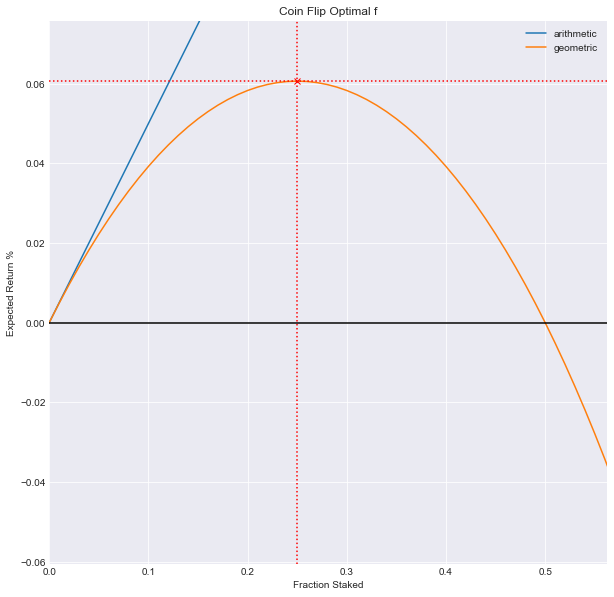

Optimal f: 0.25
Expected Value (Arithmetic): 12.5%
Expected Value (Geometric): 6.066%


In [15]:
def get_f(returns):
    exp_df = pd.DataFrame(columns=['arithmetic', 'geometric'])
    f_values = np.linspace(0, 1, 101)    
    max_loss = worst_loss(returns)
    bounded_f = f_values / max_loss
   
    for f in bounded_f:
        exp_df.loc[f, 'arithmetic'] = expected_arith(f * returns)
        exp_df.loc[f, 'geometric'] = expected_geom(f * returns)
    optimal_f = exp_df['geometric'].astype(float).idxmax()
    
    return {'f_curve':exp_df, 'optimal_f':optimal_f, 'max_loss':max_loss}

def f_plots2(f, title=''):
    f_curve = f['f_curve']
    optimal_f = f['optimal_f']
    max_loss = f['max_loss']
    f_exp = f_curve.loc[optimal_f, 'geometric']
    
    fig, ax = plt.subplots(2, 1, figsize=(15, 15), sharex=False)
    f_curve.plot(ax=ax[0])
    ax[0].plot(optimal_f, f_curve.loc[optimal_f, 'geometric'], color='r', marker='x')
    ax[0].axhline(0, color='k')
    ax[0].set_xlabel('Fraction Staked')
    ax[0].set_ylabel('Expected Return %')
    ax[0].set_title(title + ' Optimal f')

    f_curve.plot(ax=ax[1])
    ax[1].plot(optimal_f, f_curve.loc[optimal_f, 'geometric'], color='r', marker='x')
    ax[1].axhline(0, color='k')
    ax[1].axvline(optimal_f, color='r', linestyle=':')
    ax[1].axhline(f_curve.loc[optimal_f, 'geometric'], color='r', linestyle=':')
    ax[1].set_xlim(0, optimal_f * 2.25)
    ax[1].set_ylim(-f_exp, f_exp * 1.25)
    ax[1].set_xlabel('Fraction Staked')
    ax[1].set_ylabel('Expected Return %')
    ax[1].set_title(title + ' Optimal f')

    plt.savefig(title + ' optimal f.png', bbox_inches='tight')
    plt.show()
    
def f_plots(f, title=''):
    f_curve = f['f_curve']
    optimal_f = f['optimal_f']
    max_loss = f['max_loss']
    f_exp = f_curve.loc[optimal_f, 'geometric']
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 10), sharex=False)
    f_curve.plot(ax=ax)
    ax.plot(optimal_f, f_curve.loc[optimal_f, 'geometric'], color='r', marker='x')
    ax.axhline(0, color='k')
    ax.axvline(optimal_f, color='r', linestyle=':')
    ax.axhline(f_curve.loc[optimal_f, 'geometric'], color='r', linestyle=':')
    ax.set_xlim(0, optimal_f * 2.25)
    ax.set_ylim(-f_exp, f_exp * 1.25)
    ax.set_xlabel('Fraction Staked')
    ax.set_ylabel('Expected Return %')
    ax.set_title(title + ' Optimal f')

    plt.savefig(title + ' optimal f.png', bbox_inches='tight')
    plt.show()
    
def f_results(f):
    f_curve = f['f_curve']
    optimal_f = f['optimal_f']
    exp_arith = f_curve.loc[optimal_f, 'arithmetic']
    exp_geom = f_curve.loc[optimal_f, 'geometric']
         
    print('Optimal f: {}'.format(np.round(optimal_f, 3)))
    print('Expected Value (Arithmetic): {}%'.format(np.round(exp_arith*100, 3)))
    print('Expected Value (Geometric): {}%'.format(np.round(exp_geom*100, 3)))
    
coin_f = get_f(coin_outcomes)
f_plots(coin_f, title='Coin Flip')
f_results(coin_f)


# Dice roll bet

In [16]:
dice_outcomes = np.array([-1, 2, -3, 4, -5, 6])

dice_outcomes_bounded = bound_returns(dice_outcomes)
dice_exp_arith = expected_arith(dice_outcomes_bounded) * 100
dice_exp_geom = expected_geom(dice_outcomes_bounded) * 100

print('Expected Value (Arithmetic): {}%'.format(np.round(dice_exp_arith), 3))
print('Expected Value (Geometric): {}%'.format(np.round(dice_exp_geom), 3))

Expected Value (Arithmetic): 10.0%
Expected Value (Geometric): -100.0%


In [17]:
kelly_results(dice_outcomes)

Kelly f: 0.025
Expected Value (Arithmetic): 1.25%
Expected Value (Geometric): 0.231%


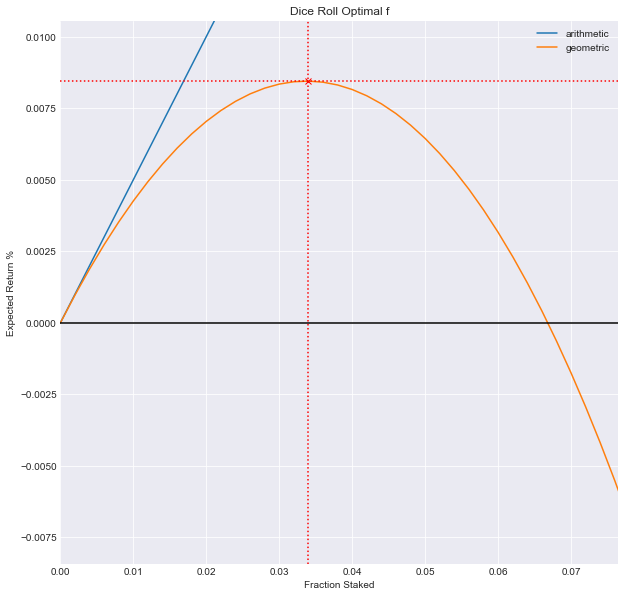

Optimal f: 0.034
Expected Value (Arithmetic): 1.7%
Expected Value (Geometric): 0.844%


In [18]:
dice_f = get_f(dice_outcomes)
f_plots(dice_f, title='Dice Roll')
f_results(dice_f)


# Real life market application on SPY

In [19]:
def download_daily_data( ticker, start, end ):
    """
    The function downloads daily market data to a pandas DataFrame
    using the 'yfinance' API between the dates specified.
    """
    data = yf.download(ticker, start, end)
    
    return data

# Create ticker, start and end dates variables
ticker1 = "SPY"   
end1 = dt.date(2021, 11, 18)    #dt.datetime.now() 
start1 = end1 - dt.timedelta(days=365*15)   # 15 years ago

# Use 'download_daily_data' to download the data
df = download_daily_data(ticker=ticker1, start=start1, end=end1)

df.head()

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2006-11-21  140.490005  140.669998  140.289993  140.639999  103.955086   
2006-11-22  140.750000  141.160004  140.500000  140.919998  104.162094   
2006-11-24  140.240005  140.839996  140.199997  140.350006  103.740776   
2006-11-27  140.279999  140.350006  138.380005  138.419998  102.314148   
2006-11-28  138.240005  139.160004  138.110001  139.020004  102.757713   

               Volume  
Date                   
2006-11-21   51367900  
2006-11-22   45505300  
2006-11-24   30998000  
2006-11-27   84545100  
2006-11-28  106652900

In [20]:
# Use daily returns from adjusted closing prices
spy_returns = df['Adj Close'].pct_change().dropna()
spy_returns.describe()

count    3773.000000
mean        0.000479
std         0.012702
min        -0.109424
25%        -0.003808
50%         0.000718
75%         0.005860
max         0.145197
Name: Adj Close, dtype: float64

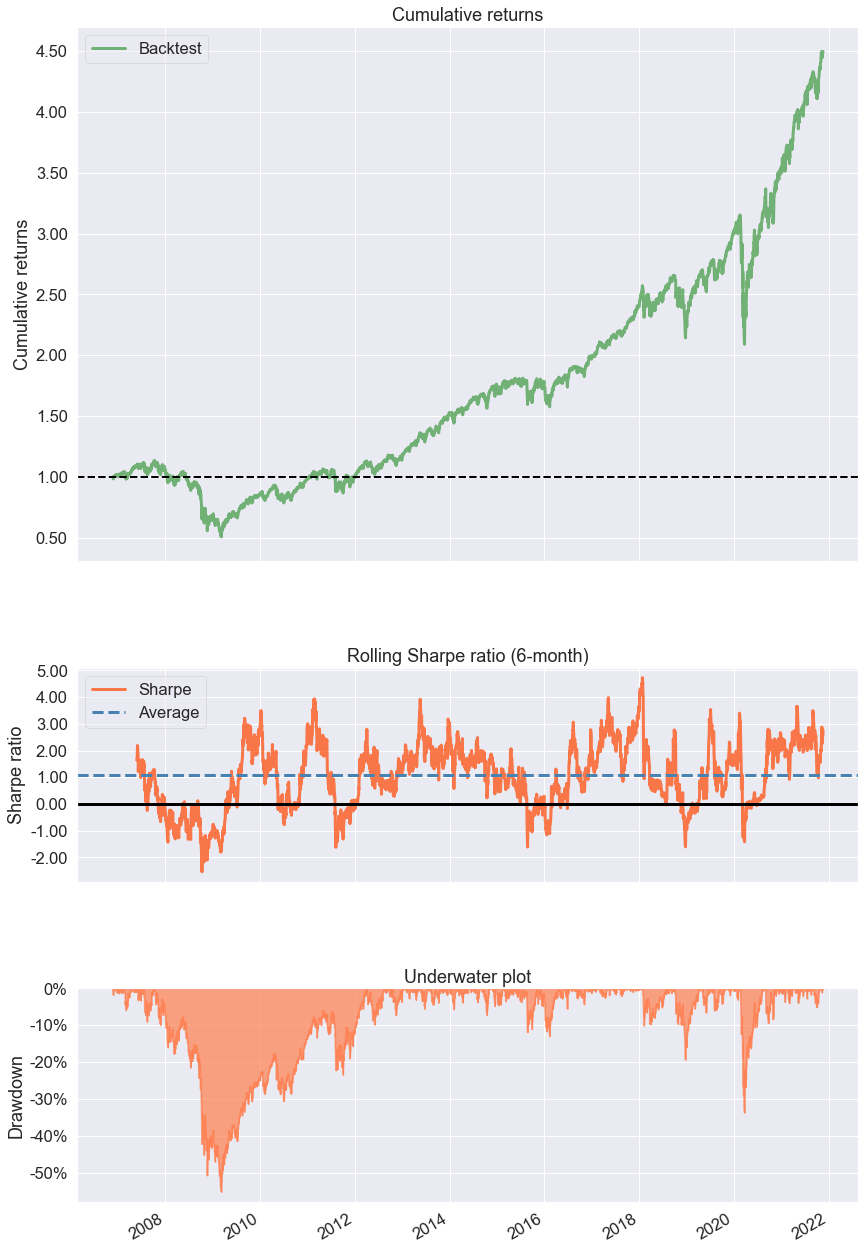

In [21]:
# Further analysis
pf.create_simple_tear_sheet(spy_returns)

In [22]:
# Computing what the Kelly formula gives
kelly_results(spy_returns)

Kelly f: 0.577
Expected Value (Arithmetic): 0.028%
Expected Value (Geometric): 0.019%


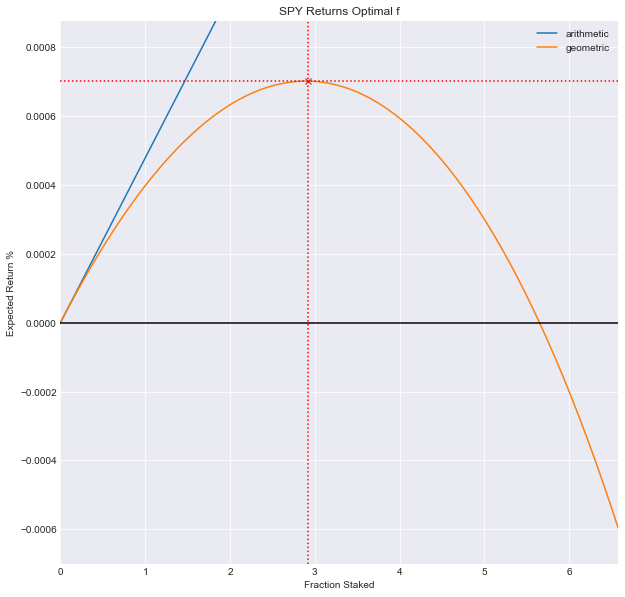

Optimal f: 2.924
Expected Value (Arithmetic): 0.14%
Expected Value (Geometric): 0.07%


In [23]:
# Again comparing this to Optimal f
spy_f = get_f(spy_returns)
f_plots(spy_f, title='SPY Returns')
f_results(spy_f)

# Kelly Capital Growth Investment Criterion

In [24]:
def optimal_f(returns):
    mu = returns.mean() * 252     # Calculates the annualized return.
    sigma = returns.std() * 252 ** 0.5  # Calculates the annualized volatility.
    r = 0    #3 month US T-bills yield is currently close to zero, 0.05% to be exact

    optimal_f = (mu - r) / (sigma ** 2)
    
    print('Optimal f: {}'.format(np.round(optimal_f, 2)))

In [25]:
optimal_f(spy_returns)

Optimal f: 2.97


In [26]:
# Create a copy of df called dfa to work on.
dfa = df.copy()

# Ideal Kelly strategy returns 
f = 2.97
dfa['kelly_returns'] = spy_returns * f
# Equity calculations
dfa['spy_equity'] = np.cumprod(1 + spy_returns)
dfa['kelly_equity'] = np.cumprod(1 + dfa['kelly_returns'])

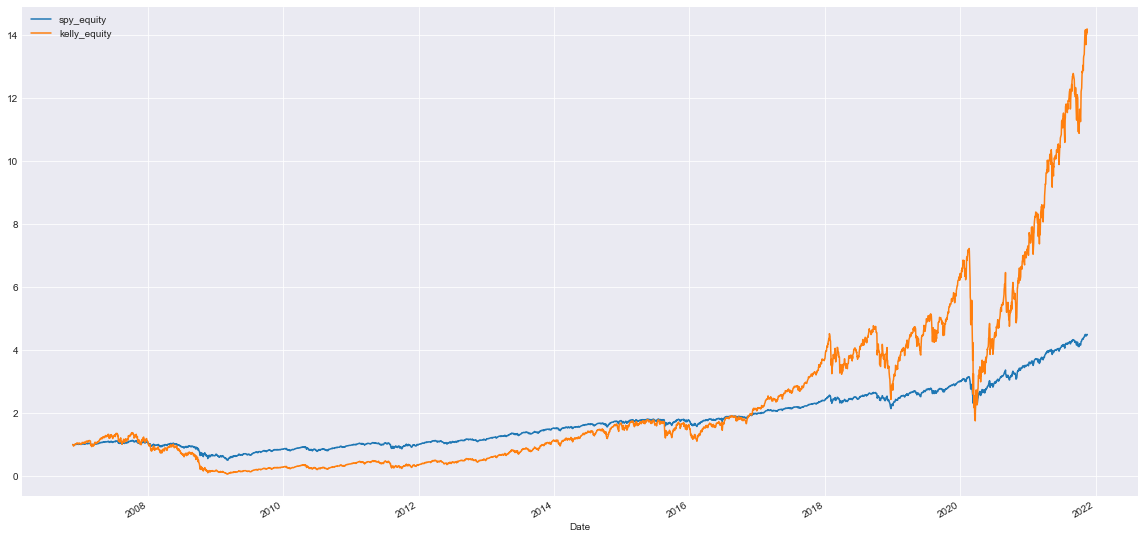

In [27]:
# To visualise the equity curves:
dfa[['spy_equity', 'kelly_equity'] ]. plot(figsize = (20, 10), grid = True)
plt.show() ;

In [28]:
# Terminal wealth for the backtesting period can be extracted from the last equity value 
print( 'Terminal wealth for SPY: {}'.format(np.round(dfa['spy_equity'] [-1], 2)))
print( 'Terminal wealth for Kelly: {}'.format(np.round(dfa['kelly_equity'] [-1], 2)))

Terminal wealth for SPY: 4.49
Terminal wealth for Kelly: 14.09


In [29]:
# Annualized return for the backtesting period 
print( 'Annualized return for SPY: {}%'.format(np.round((dfa['spy_equity'] [-1] ** (1/(len(dfa.index)/252)) -1)*100, 2)))
print( 'Annualized return for Kelly: {}%'.format(np.round((dfa['kelly_equity'][-1] ** (1/(len(dfa.index)/252)) -1)*100, 2)))

Annualized return for SPY: 10.54%
Annualized return for Kelly: 19.32%


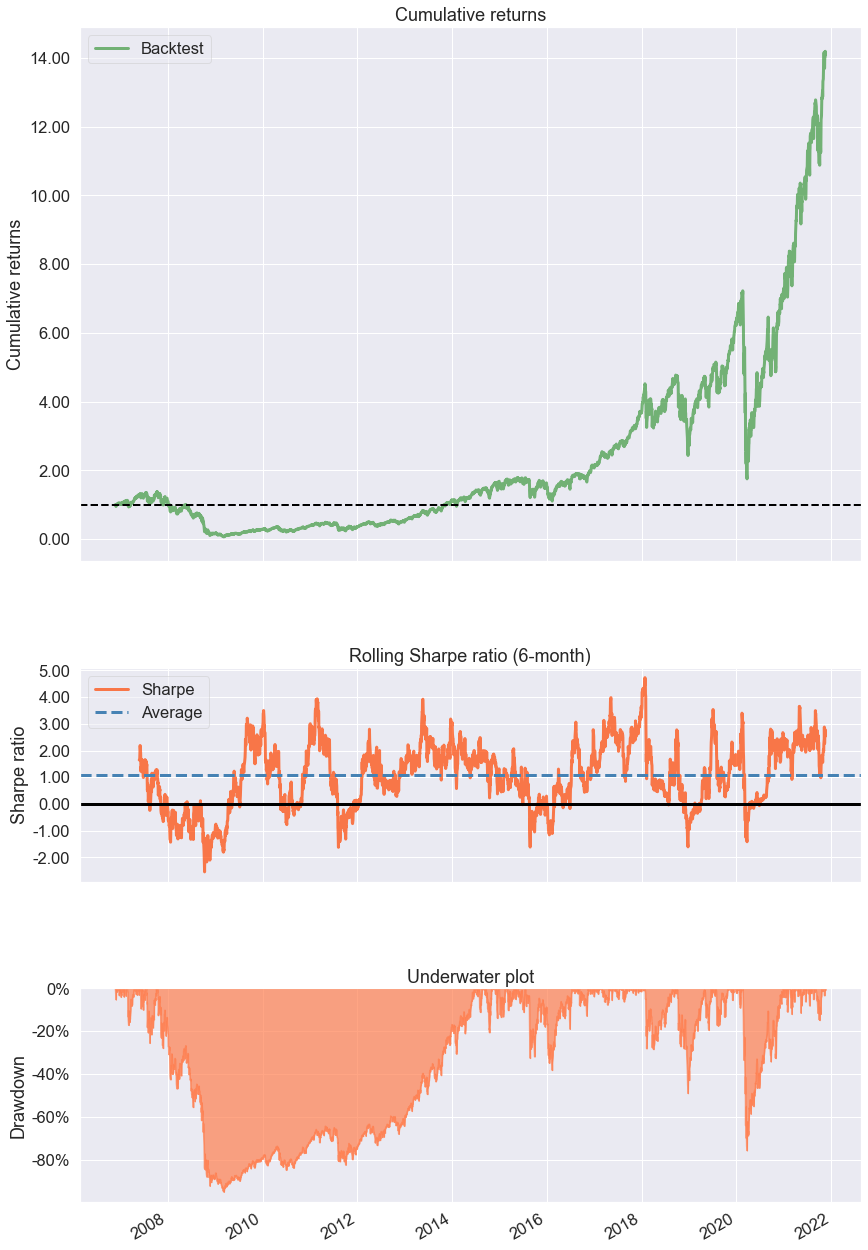

In [30]:
# Further analysis
pf.create_simple_tear_sheet(dfa['kelly_returns'])

# Fractional Kelly

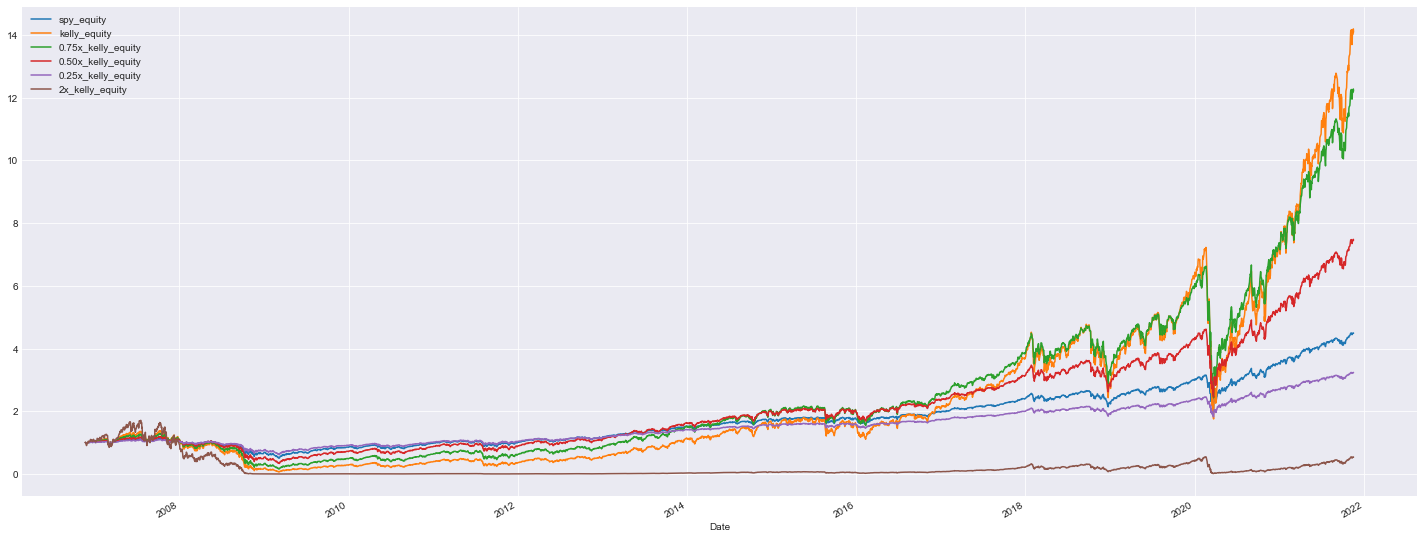

In [32]:
# Fractional Kelly strategy returns 
dfa['0.75x_kelly_returns'] = spy_returns * 0.75*f
dfa['0.50x_kelly_returns'] = spy_returns * 0.50*f
dfa['0.25x_kelly_returns'] = spy_returns * 0.25*f
dfa['2x_kelly_returns'] = spy_returns * 2*f

# Equity calculations
dfa['0.75x_kelly_equity'] = np.cumprod(1+ dfa['0.75x_kelly_returns'] )
dfa['0.50x_kelly_equity'] = np.cumprod(1+ dfa['0.50x_kelly_returns'] )
dfa['0.25x_kelly_equity'] = np.cumprod(1+ dfa['0.25x_kelly_returns'] )
dfa['2x_kelly_equity'] = np.cumprod(1+ dfa['2x_kelly_returns'] )

# To visualise the equity curves:
dfa[['spy_equity', 'kelly_equity', '0.75x_kelly_equity', '0.50x_kelly_equity', '0.25x_kelly_equity', '2x_kelly_equity']]. plot(figsize = (25, 10), grid = True)
plt.show() ;

# Simple momentum strategy 

In [33]:
class backtesting_crossover:
    
    def __init__(self, ticker, start_date, end_date, ma_short, ma_long):
        self.ticker = ticker
        self.start_date = start_date
        self.end_date = end_date
        self.ma_short = ma_short
        self.ma_long = ma_long
        
        # Call the basic methods in the __init__ constructor itself so that they are automatically executed upon object creation
        self.fetch_data()
        self.indicators()
        self.signals()
        self.positions()
        self.returns()
  
    def fetch_data(self):
        self.df = yf.download(self.ticker, self.start_date, self.end_date)
        
    def indicators(self):
        self.df['ma_short'] = self.df['Adj Close'].rolling(window= self.ma_short, center=False).mean()
        self.df['ma_long'] = self.df['Adj Close'].rolling(window= self.ma_long, center=False).mean()
        self.df['ma_short_prev'] = self.df['ma_short'].shift()
        self.df['ma_long_prev'] = self.df['ma_long'].shift()
        self.df.dropna(inplace=True)
   
    def signals(self):
        self.df['signal'] = np.where((self.df['ma_short'] > self.df['ma_long']) 
                            & (self.df['ma_short_prev'] < self.df['ma_long_prev']), 1, 0)
        
        self.df['signal'] = np.where((self.df['ma_short'] < self.df['ma_long']) 
                            & (self.df['ma_short_prev'] > self.df['ma_long_prev']), -1, self.df['signal'])
    
    def positions(self):
        self.df['position'] = self.df['signal'].replace(to_replace=0, method='ffill')
        
    def returns(self):
        self.df['bnh_returns'] = np.log(self.df['Adj Close'] / self.df['Adj Close'].shift(1))
        self.df['strategy_returns'] = self.df['bnh_returns'] * self.df['position'].shift(1)
        print('Total return:',self.df['strategy_returns'].cumsum()[-1] )  
        return self.df['strategy_returns'].cumsum()[-1]
       
    def analysis(self):
        # A plot to check if the strategy is working as planned:
        self.df[['ma_short','ma_long', 'position']].plot(figsize=(15, 6), secondary_y='position', grid=True)
        plt.title('checking if positions are generated properly')
        plt.show()

        # A plot to check how the strategy strategy performs relative to buy & hold
        self.df[['bnh_returns','strategy_returns']].cumsum().plot(figsize=(15, 6), secondary_y='position', grid=True)
        plt.title("Buy & hold' vs 'Momentum strategy' cumulative returns")
        plt.show()

        # general analytics
        pf.create_simple_tear_sheet(self.df['strategy_returns'])
        

In [34]:
# Define start and end dates
end1 = dt.date(2021, 11, 18)    #dt.datetime.now() 
start1 = end1 - dt.timedelta(days=365*15)   # 15 years ago

print(start1)
print(end1)

2006-11-22
2021-11-18


In [35]:
# A quick and simple Optimization
ma_short_list = [5, 10, 15, 20]    # Create list of parameters
ma_long_list = [25, 50, 100]

ma_short = []   # Create three empty lists for storing after a loop below
ma_long = []
net_returns = []

for i in ma_short_list:
    for j in ma_long_list:
        print('For', i, j)
        a = backtesting_crossover('SPY', start1, end1, i , j )
        ma_short.append(i)
        ma_long.append(j)
        net_returns.append(a.returns())

For 5 25
[*********************100%***********************]  1 of 1 completed
Total return: 0.34131641858366957
Total return: 0.34131641858366957
For 5 50
[*********************100%***********************]  1 of 1 completed
Total return: 0.3754004484384578
Total return: 0.3754004484384578
For 5 100
[*********************100%***********************]  1 of 1 completed
Total return: 1.1354964987486007
Total return: 1.1354964987486007
For 10 25
[*********************100%***********************]  1 of 1 completed
Total return: 0.30063109548342665
Total return: 0.30063109548342665
For 10 50
[*********************100%***********************]  1 of 1 completed
Total return: 0.27109039014191066
Total return: 0.27109039014191066
For 10 100
[*********************100%***********************]  1 of 1 completed
Total return: 1.1625028475119328
Total return: 1.1625028475119328
For 15 25
[*********************100%***********************]  1 of 1 completed
Total return: 0.3544624673170986
Total return:

In [36]:
#Convert into a DataFrame and sorting to find the best set of parameters
results = pd.DataFrame({'ma_short' : ma_short, 'ma_long' : ma_long, 'net_returns' : net_returns} )
results.sort_values(by = 'net_returns', ascending = False)

ma_short  ma_long  net_returns
5         10      100     1.162503
2          5      100     1.135496
9         20       25     1.087885
8         15      100     0.735865
7         15       50     0.657924
11        20      100     0.625099
1          5       50     0.375400
6         15       25     0.354462
10        20       50     0.345853
0          5       25     0.341316
3         10       25     0.300631
4         10       50     0.271090

In [37]:
# Now taking a closer look at the 10-100 optimum strategy
SPY_momentum = backtesting_crossover('SPY', start1, end1, 10, 100)

[*********************100%***********************]  1 of 1 completed
Total return: 1.1624998033485545


In [38]:
SPY_momentum.df['position'].value_counts()

 1    2713
-1     887
 0      74
Name: position, dtype: int64

In [39]:
SPY_momentum.df['signal'].value_counts()

 0    3630
-1      22
 1      22
Name: signal, dtype: int64

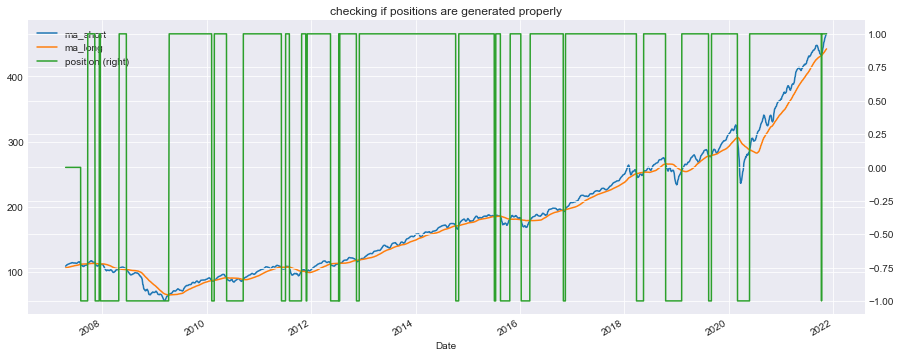

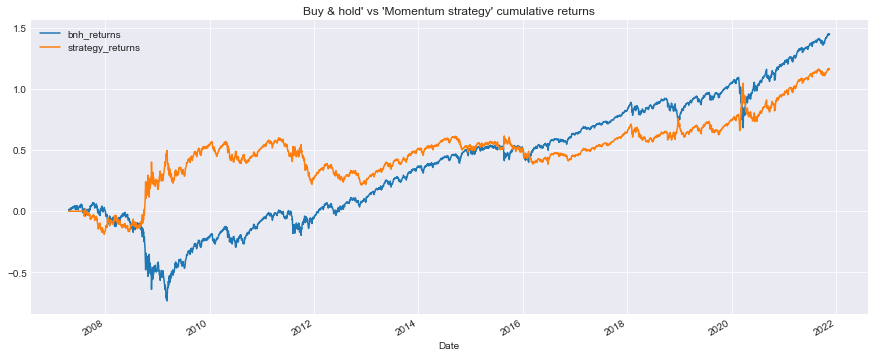

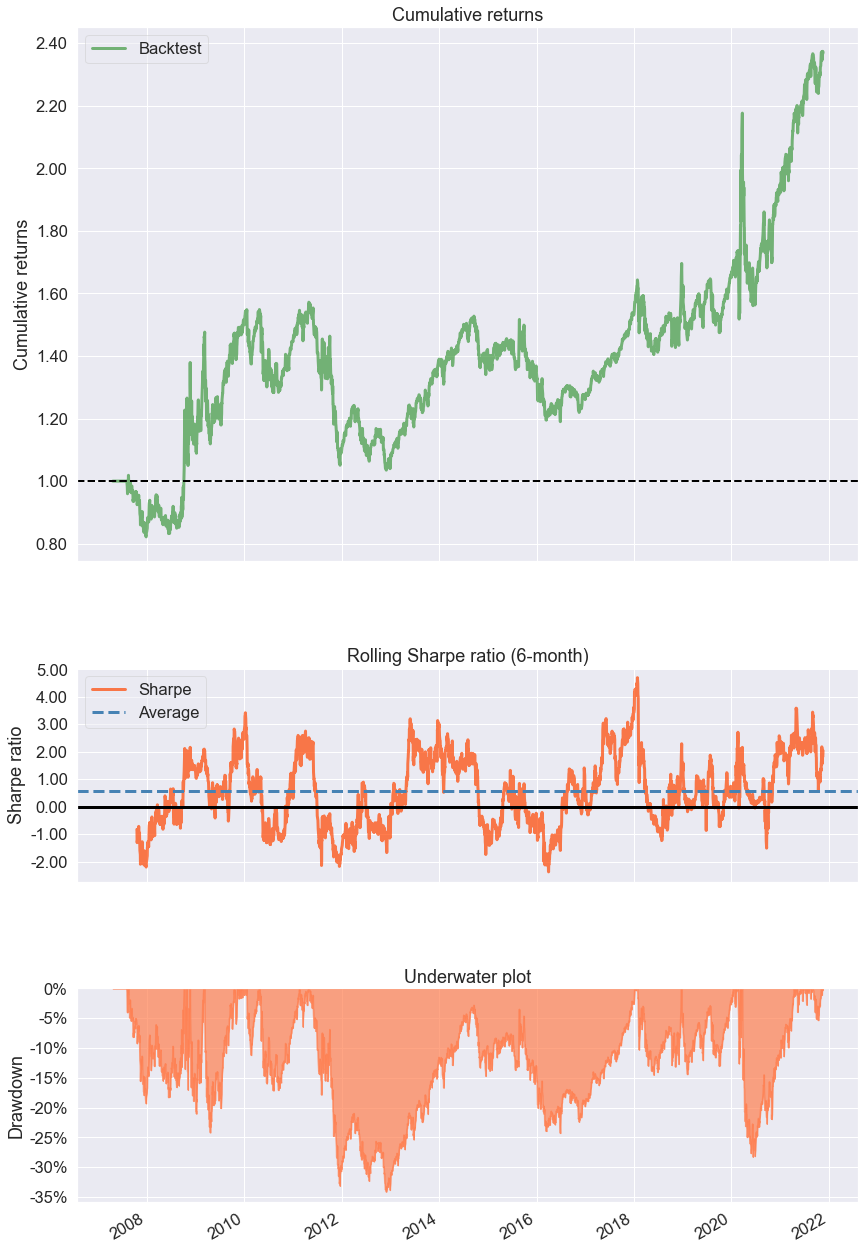

In [40]:
SPY_momentum.analysis()

In [41]:
# Computing the optimum Kelly f
optimal_f(SPY_momentum.df['strategy_returns'])

Optimal f: 1.94


In [47]:
# Kelly-sized momentum strategy returns 
f = 1.94
SPY_momentum.df['kelly_returns'] = SPY_momentum.df['strategy_returns'] * f
SPY_momentum.df['0.5x_kelly_returns'] = SPY_momentum.df['strategy_returns'] * (0.5*f)

# Equity calculations
SPY_momentum.df['bnh_equity'] = np.cumprod(1 + SPY_momentum.df['bnh_returns'])
SPY_momentum.df['strategy_equity'] = np.cumprod(1 + SPY_momentum.df['strategy_returns'])
SPY_momentum.df['kelly_equity'] = np.cumprod(1 + SPY_momentum.df['kelly_returns'])
SPY_momentum.df['0.5x_kelly_equity'] = np.cumprod(1 + SPY_momentum.df['0.5x_kelly_returns'])

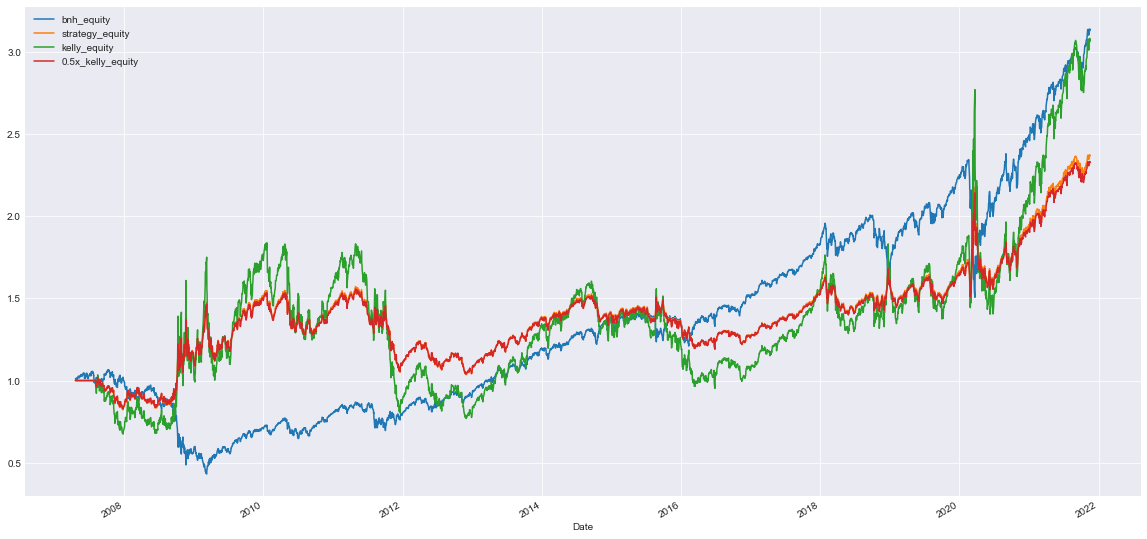

In [48]:
# To visualise the equity curves:
SPY_momentum.df[['bnh_equity', 'strategy_equity', 'kelly_equity', '0.5x_kelly_equity']]. plot(figsize = (20, 10), grid = True)
plt.show() ;

In [49]:
# Terminal wealth for the backtesting period can be extracted from the last equity value 
print( 'Terminal wealth for Buy & Hold Strategy : {}'.format(np.round(SPY_momentum.df['bnh_equity'] [-1], 2)))
print( 'Terminal wealth for Momentum Strategy : {}'.format(np.round(SPY_momentum.df['strategy_equity'] [-1], 2)))
print( 'Terminal wealth for Kelly-sized Strategy : {}'.format(np.round(SPY_momentum.df['kelly_equity'] [-1], 2)))
print( 'Terminal wealth for 1/2 Kelly Strategy : {}'.format(np.round(SPY_momentum.df['0.5x_kelly_equity'] [-1], 2)))

Terminal wealth for Buy & Hold Strategy : 3.13
Terminal wealth for Momentum Strategy : 2.37
Terminal wealth for Kelly-sized Strategy : 3.07
Terminal wealth for 1/2 Kelly Strategy : 2.33


In [50]:
# Annualized return for the backtesting period 
print( 'Annualized return for Buy & Hold Strategy : {}%'.format(np.round((SPY_momentum.df['bnh_equity']  [-1] ** (1/(len(dfa.index)/252)) -1)*100, 2)))
print( 'Annualized return for Momentum Strategy : {}%'.format(np.round((SPY_momentum.df['strategy_equity']  [-1] ** (1/(len(dfa.index)/252)) -1)*100, 2)))
print( 'Annualized return for  Kelly-sized Strategy : {}%'.format(np.round((SPY_momentum.df['kelly_equity'] [-1] ** (1/(len(dfa.index)/252)) -1)*100, 2)))
print( 'Annualized return for  1/2 Kelly Strategy : {}%'.format(np.round((SPY_momentum.df['0.5x_kelly_equity'] [-1] ** (1/(len(dfa.index)/252)) -1)*100, 2)))


Annualized return for Buy & Hold Strategy : 7.92%
Annualized return for Momentum Strategy : 5.93%
Annualized return for  Kelly-sized Strategy : 7.77%
Annualized return for  1/2 Kelly Strategy : 5.81%


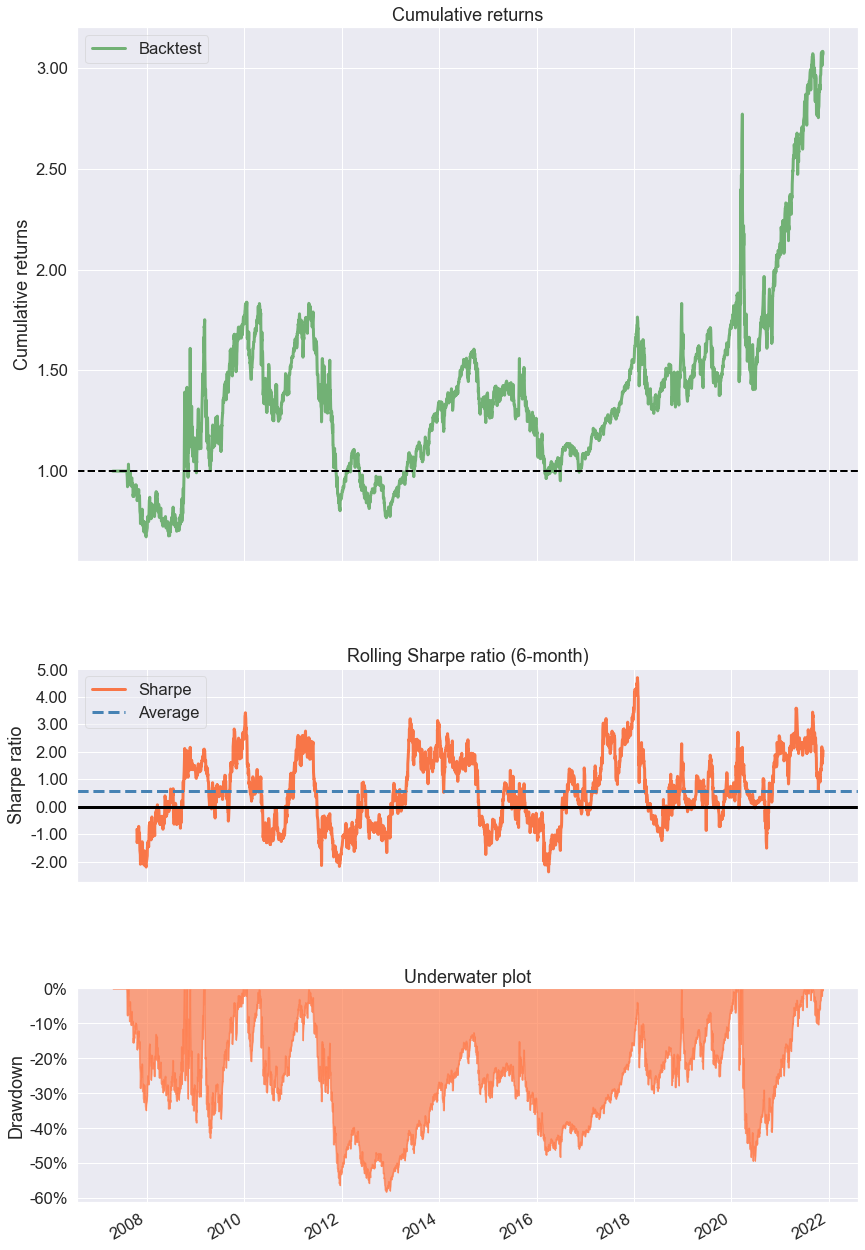

In [51]:
# Further analysis of Kelly-sized strategy:
pf.create_simple_tear_sheet(SPY_momentum.df['kelly_returns'])

# Momentum strategy using EMAs

In [52]:
# 'backtesting_EMA_crossover' is the child class, and 'backtesting_crossover' is the parent class.

class backtesting_EMA_crossover(backtesting_crossover):
    
    # Simply define a new indicators method and get all other methods and properties from parent class
    def indicators(self):
        self.df['ma_short'] = self.df['Adj Close'].ewm(span= self.ma_short, adjust=False).mean()
        self.df['ma_long'] = self.df['Adj Close'].ewm(span= self.ma_long, adjust=False).mean()
        self.df['ma_short_prev'] = self.df['ma_short'].shift()
        self.df['ma_long_prev'] = self.df['ma_long'].shift()
        self.df.dropna(inplace=True)
        
    # A static method
    @staticmethod
    def date_of_backtest():
        print('Date of backtest:', dt.now().date())
        
    # A class method
    @classmethod
    def about_this_backtest(cls):
        print('We are backtesting the long-short EMA crossover strategy.')


In [53]:
# A quick and simple Optimization
fast_ma_list = [5, 10, 15, 20]    # Create list of parameters
slow_ma_list = [25, 50, 100]

fast_ma = []   # Create three empty lists for storing after a loop below
slow_ma = []
net_returns = []

for i in fast_ma_list:
    for j in slow_ma_list:
        print('For', i, j)
        a = backtesting_EMA_crossover('SPY', start1, end1, i , j )
        fast_ma.append(i)
        slow_ma.append(j)
        net_returns.append(a.returns())
        

For 5 25
[*********************100%***********************]  1 of 1 completed
Total return: -0.05260646066779493
Total return: -0.05260646066779493
For 5 50
[*********************100%***********************]  1 of 1 completed
Total return: 0.6471326572572759
Total return: 0.6471326572572759
For 5 100
[*********************100%***********************]  1 of 1 completed
Total return: 1.3574177755841366
Total return: 1.3574177755841366
For 10 25
[*********************100%***********************]  1 of 1 completed
Total return: 0.22087595860543005
Total return: 0.22087595860543005
For 10 50
[*********************100%***********************]  1 of 1 completed
Total return: 0.9639959570693241
Total return: 0.9639959570693241
For 10 100
[*********************100%***********************]  1 of 1 completed
Total return: 1.2165231695811234
Total return: 1.2165231695811234
For 15 25
[*********************100%***********************]  1 of 1 completed
Total return: 0.22967964779644492
Total return

In [54]:
#Convert into a DataFrame and sorting to find the best set of parameters
results = pd.DataFrame({'fast_ma' : fast_ma, 'slow_ma' : slow_ma, 'net_returns' : net_returns} )
results.sort_values(by = 'net_returns', ascending = False)


fast_ma  slow_ma  net_returns
2         5      100     1.357418
5        10      100     1.216523
7        15       50     1.183672
10       20       50     1.154194
8        15      100     1.120930
4        10       50     0.963996
11       20      100     0.752184
1         5       50     0.647133
9        20       25     0.287896
6        15       25     0.229680
3        10       25     0.220876
0         5       25    -0.052606

In [55]:
# Now taking a closer look at the 5-100 optimum strategy
SPY_EMA_momentum = backtesting_EMA_crossover('SPY', start1, end1, 5, 100)

[*********************100%***********************]  1 of 1 completed
Total return: 1.3574204072807237


In [56]:
SPY_EMA_momentum.df['position'].value_counts()


 1    2934
-1     838
 0       1
Name: position, dtype: int64

In [57]:
SPY_EMA_momentum.df['signal'].value_counts()


 0    3703
-1      35
 1      35
Name: signal, dtype: int64

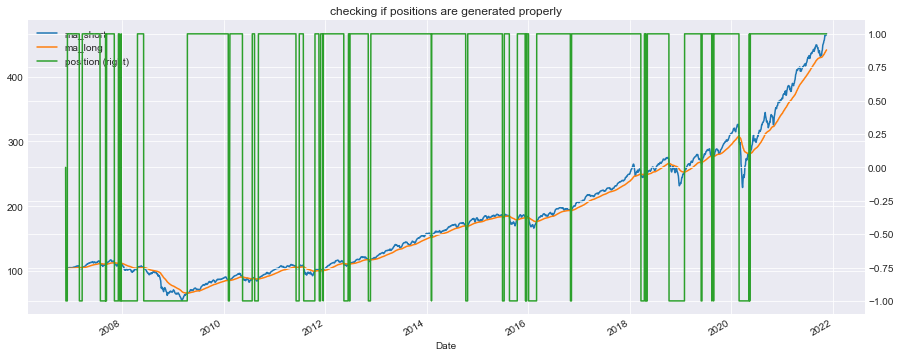

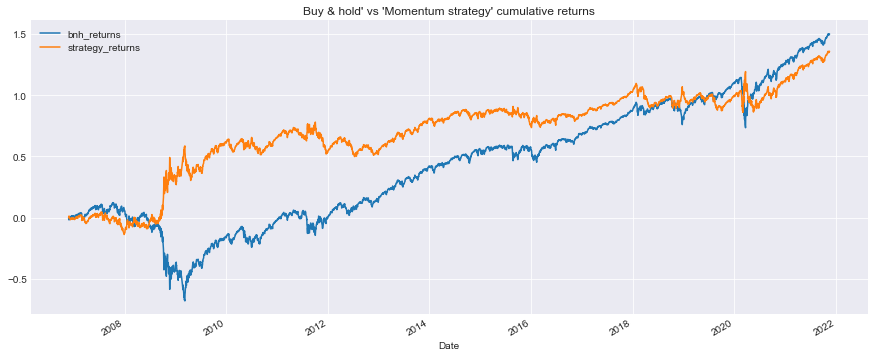

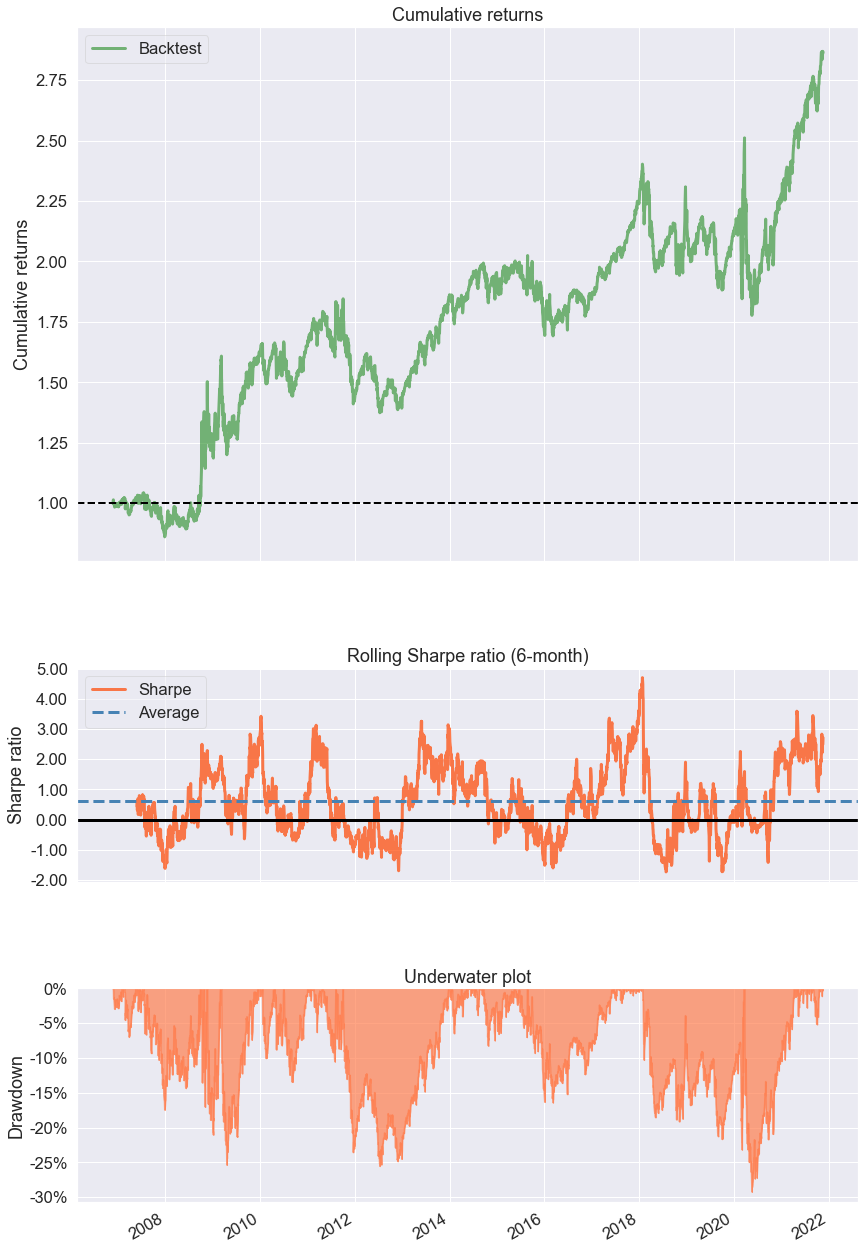

In [58]:
SPY_EMA_momentum.analysis()


In [59]:
# Computing the optimal Kelly f
optimal_f(SPY_EMA_momentum.df['strategy_returns'] )

Optimal f: 2.22


In [61]:
# Kelly-sized momentum strategy returns 
f = 2.22
SPY_EMA_momentum.df['kelly_returns'] = SPY_EMA_momentum.df['strategy_returns'] * f
SPY_EMA_momentum.df['0.5x_kelly_returns'] = SPY_EMA_momentum.df['strategy_returns'] * (0.5*f)

# Equity calculations
SPY_EMA_momentum.df['bnh_equity'] = np.cumprod(1 + SPY_EMA_momentum.df['bnh_returns'])
SPY_EMA_momentum.df['strategy_equity'] = np.cumprod(1 + SPY_EMA_momentum.df['strategy_returns'])
SPY_EMA_momentum.df['kelly_equity'] = np.cumprod(1 + SPY_EMA_momentum.df['kelly_returns'])
SPY_EMA_momentum.df['0.5x_kelly_equity'] = np.cumprod(1 + SPY_EMA_momentum.df['0.5x_kelly_returns'])

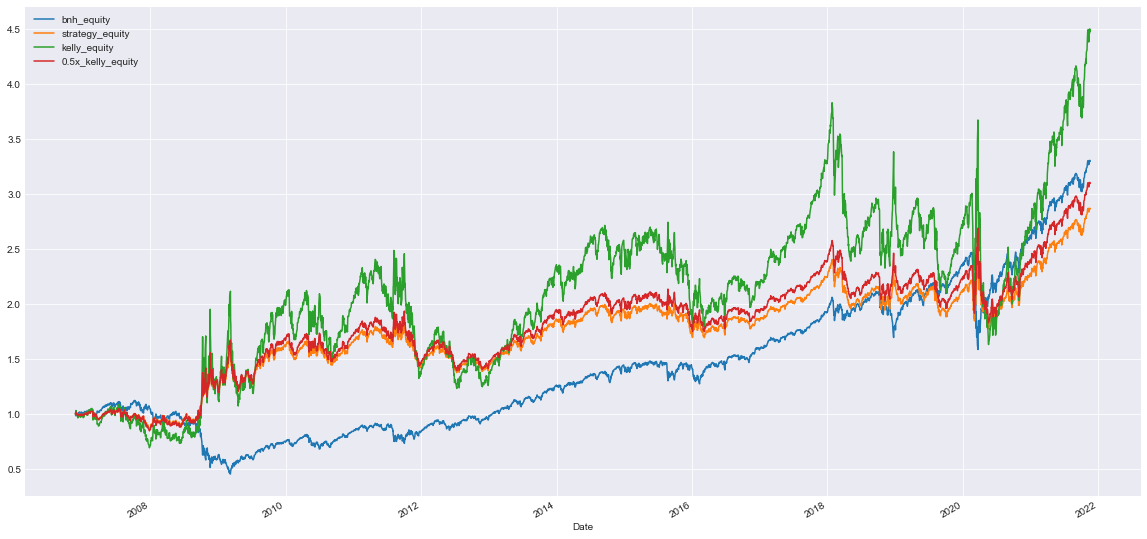

In [62]:
# To visualise the equity curves:
SPY_EMA_momentum.df[['bnh_equity', 'strategy_equity', 'kelly_equity', '0.5x_kelly_equity']]. plot(figsize = (20, 10), grid = True)
plt.show() ;

In [63]:
# Terminal wealth for the backtesting period can be extracted from the last equity value 
print( 'Terminal wealth for Buy & Hold Strategy : {}'.format(np.round(SPY_EMA_momentum.df['bnh_equity'] [-1], 2)))
print( 'Terminal wealth for EMA Momentum Strategy : {}'.format(np.round(SPY_EMA_momentum.df['strategy_equity'] [-1], 2)))
print( 'Terminal wealth for Kelly-sized Strategy : {}'.format(np.round(SPY_EMA_momentum.df['kelly_equity'] [-1], 2)))
print( 'Terminal wealth for 1/2 Kelly Strategy : {}'.format(np.round(SPY_EMA_momentum.df['0.5x_kelly_equity'] [-1], 2)))

Terminal wealth for Buy & Hold Strategy : 3.3
Terminal wealth for EMA Momentum Strategy : 2.86
Terminal wealth for Kelly-sized Strategy : 4.47
Terminal wealth for 1/2 Kelly Strategy : 3.1


In [64]:
# Annualized return for the backtesting period 
print( 'Annualized return for Buy & Hold Strategy : {}%'.format(np.round((SPY_EMA_momentum.df['bnh_equity']  [-1] ** (1/(len(dfa.index)/252)) -1)*100, 2))) 
print( 'Annualized return for EMA Momentum Strategy : {}%'.format(np.round((SPY_EMA_momentum.df['strategy_equity']  [-1] ** (1/(len(dfa.index)/252)) -1)*100, 2))) 
print( 'Annualized return for  Kelly-sized Strategy : {}%'.format(np.round((SPY_EMA_momentum.df['kelly_equity'] [-1] ** (1/(len(dfa.index)/252)) -1)*100, 2))) 
print( 'Annualized return for  1/2 Kelly Strategy : {}%'.format(np.round((SPY_EMA_momentum.df['0.5x_kelly_equity'] [-1] ** (1/(len(dfa.index)/252)) -1)*100, 2))) 

Annualized return for Buy & Hold Strategy : 8.29%
Annualized return for EMA Momentum Strategy : 7.27%
Annualized return for  Kelly-sized Strategy : 10.52%
Annualized return for  1/2 Kelly Strategy : 7.84%


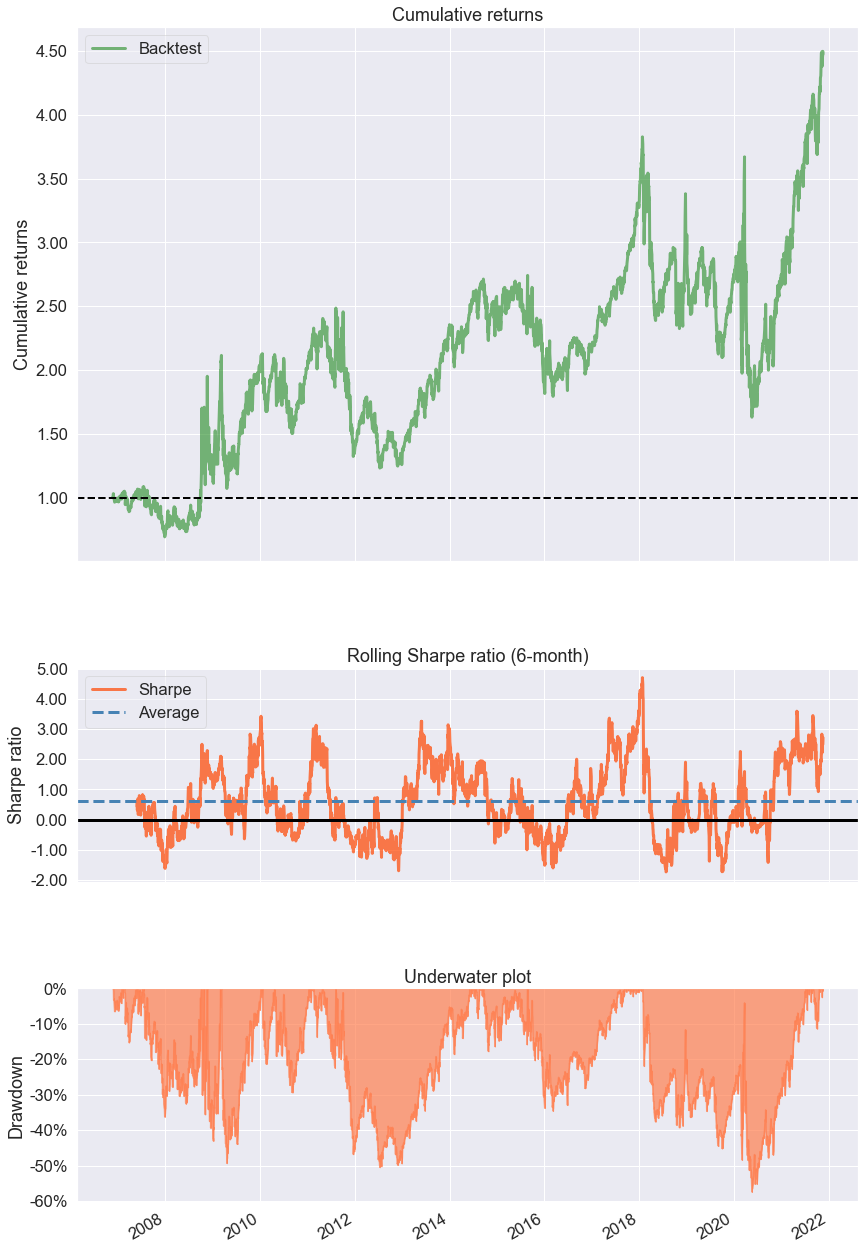

In [65]:
# Further analysis of Kelly-sized strategy:
pf.create_simple_tear_sheet(SPY_EMA_momentum.df['kelly_returns'])


# A simple Mean Reversion strategy using Bollinger Bands

In [66]:
class backtesting_MR:
    
    def __init__(self, ticker, start_date, end_date, SMA):
        self.ticker = ticker
        self.start_date = start_date
        self.end_date = end_date
        self.SMA = SMA

        self.fetch_data()
        self.indicators()
        self.signals()
        self.positions()
        self.returns()
        
    def fetch_data(self):
        self.df = yf.download(self.ticker, self.start_date, self.end_date)
           
    def indicators(self):
        self.df['SMA'] = self.df['Adj Close'].rolling(window= self.SMA, center=False).mean()
        self.df['SD'] = self.df['Adj Close'].rolling(window= self.SMA, center=False).std()
        self.df['UpperBB'] = self.df['SMA'] + 0.5*self.df['SD']
        self.df['LowerBB'] = self.df['SMA'] - 0.5*self.df['SD']
        self.df.dropna(inplace=True)
 
    def signals(self):
        # entry and exit
        self.df['long_entry'] = self.df['Adj Close'] < self.df['LowerBB']
        self.df['long_exit'] = self.df['Adj Close'] >= self.df['SMA']
        self.df['short_entry'] =   self.df['Adj Close'] >   self.df['UpperBB']
        self.df['short_exit'] =   self.df['Adj Close'] <=   self.df['SMA']
    
    def positions(self):
        self.df['Position_long'] = np.nan
        self.df.loc[ self.df.long_entry, 'Position_long'] = 1
        self.df.loc[ self.df.long_exit, 'Position_long'] = 0
        self.df['Position_long'] =  self.df['Position_long'].fillna(method='ffill')  

        self.df['Position_short'] = np.nan
        self.df.loc[self.df.short_entry, 'Position_short'] = -1
        self.df.loc[self.df.short_exit, 'Position_short'] = 0        
        self.df['Position_short'] = self.df['Position_short'].fillna(method='ffill')

        # Net position
        self.df['position'] = self.df['Position_long'] + self.df['Position_short']
        
    def returns(self):
        self.df['bnh_returns'] = np.log(self.df['Adj Close'] / self.df['Adj Close'].shift(1))
        self.df['strategy_returns'] = self.df['bnh_returns'] * self.df['position'].shift(1)
        print('Total return:',self.df['strategy_returns'].cumsum()[-1] )  
        return self.df['strategy_returns'].cumsum()[-1]
       
    def analysis(self):
        # A plot to check if the strategy is working as planned:
        self.df[['SMA','UpperBB', 'LowerBB']].plot(figsize=(15, 6), secondary_y='position', grid=True)
        plt.title('checking if positions are generated properly')
        plt.show()

        # A plot to check how the strategy strategy performs relative to buy & hold
        self.df[['bnh_returns','strategy_returns']].cumsum().plot(figsize=(15, 6), secondary_y='position', grid=True)
        plt.title("Buy & hold' vs 'Mean Reversion strategy' cumulative returns")
        plt.show()

        # general analytics
        pf.create_simple_tear_sheet(self.df['strategy_returns'])
        

In [67]:
# Define start and end dates
end1 = dt.date(2021, 11, 18)    #dt.datetime.now() 
start1 = end1 - dt.timedelta(days=365*15)   # 15 years ago

print(start1)
print(end1)

2006-11-22
2021-11-18


In [68]:
# A quick and simple Optimization
SMA_list = [5, 10, 15, 20, 25, 50, 100]    

SMA = []   
net_returns = []

for i in SMA_list:
    print('For', i)
    a = backtesting_MR('SPY', start1, end1, i )
    SMA.append(i)
    net_returns.append(a.returns())
    

For 5
[*********************100%***********************]  1 of 1 completed
Total return: 1.4158737848280984
Total return: 1.4158737848280984
For 10
[*********************100%***********************]  1 of 1 completed
Total return: 0.6097348022079712
Total return: 0.6097348022079712
For 15
[*********************100%***********************]  1 of 1 completed
Total return: 0.14864010134720226
Total return: 0.14864010134720226
For 20
[*********************100%***********************]  1 of 1 completed
Total return: 0.0812947372903845
Total return: 0.0812947372903845
For 25
[*********************100%***********************]  1 of 1 completed
Total return: -0.0029407041691415447
Total return: -0.0029407041691415447
For 50
[*********************100%***********************]  1 of 1 completed
Total return: -0.07412532207033742
Total return: -0.07412532207033742
For 100
[*********************100%***********************]  1 of 1 completed
Total return: -0.7027441297184985
Total return: -0.7027441

In [69]:
#Convert into a DataFrame and sorting to find the best set of parameters
results = pd.DataFrame({'SMA' : SMA, 'net_returns' : net_returns} )
results.sort_values(by = 'net_returns', ascending = False)


SMA  net_returns
0    5     1.415874
1   10     0.609735
2   15     0.148640
3   20     0.081295
4   25    -0.002941
5   50    -0.074125
6  100    -0.702744

In [70]:
# Now taking a closer look at the 5 SMA optimum strategy
SPY_MR = backtesting_MR('SPY', start1, end1, 5)

[*********************100%***********************]  1 of 1 completed
Total return: 1.415875348878887


In [71]:
SPY_MR.df['position'].value_counts()


-1.0    2071
 1.0    1295
 0.0     404
Name: position, dtype: int64

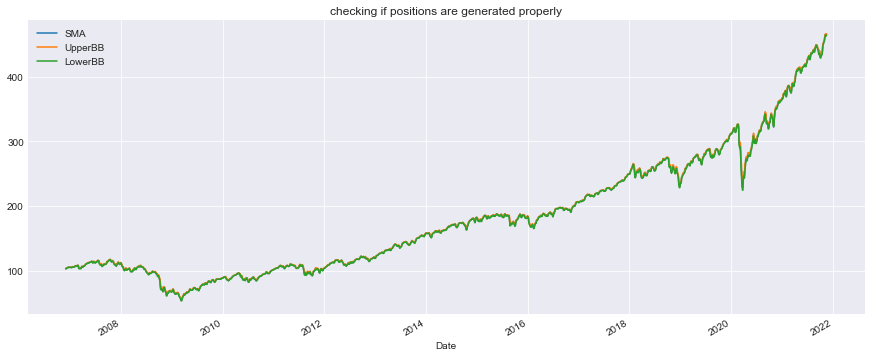

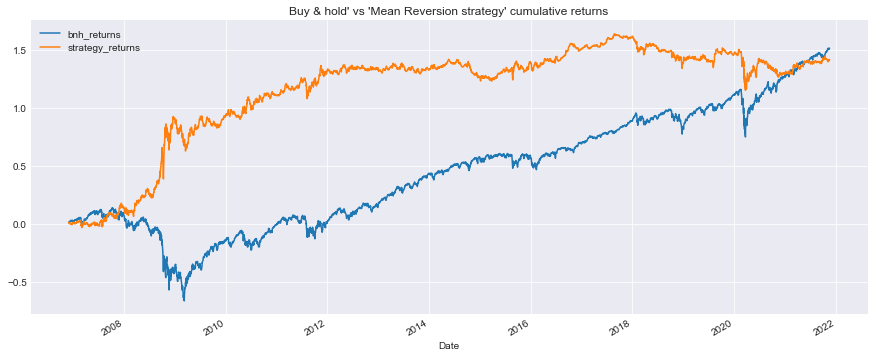

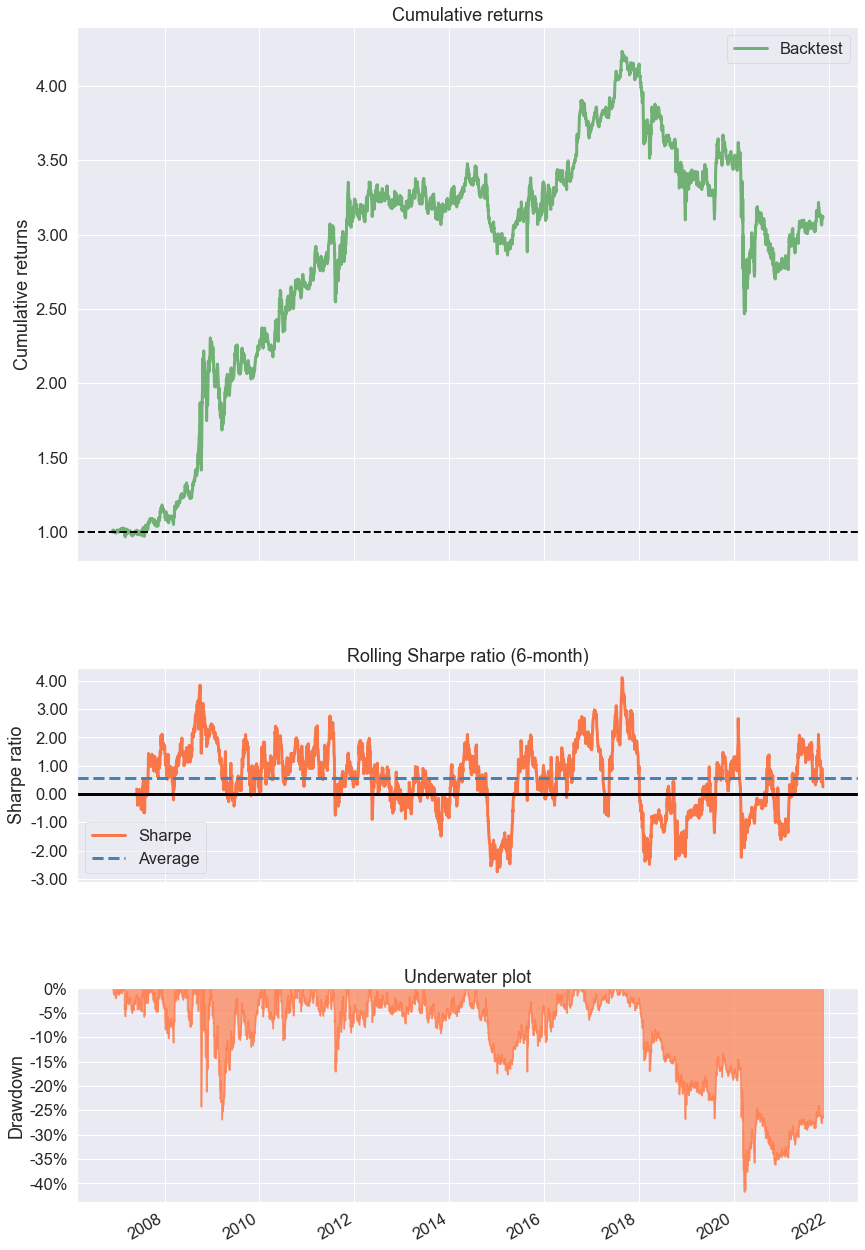

In [72]:
SPY_MR.analysis()


In [73]:
# Computing the optimal Kelly f
optimal_f(SPY_MR.df['strategy_returns'] )

Optimal f: 2.53


In [74]:
# Kelly-sized momentum strategy returns 
f = 2.53
SPY_MR.df['kelly_returns'] = SPY_MR.df['strategy_returns'] * f
SPY_MR.df['0.5x_kelly_returns'] = SPY_MR.df['strategy_returns'] * (0.5*f)

# Equity calculations
SPY_MR.df['bnh_equity'] = np.cumprod(1 + SPY_MR.df['bnh_returns'])
SPY_MR.df['strategy_equity'] = np.cumprod(1 + SPY_MR.df['strategy_returns'])
SPY_MR.df['kelly_equity'] = np.cumprod(1 + SPY_MR.df['kelly_returns'])
SPY_MR.df['0.5x_kelly_equity'] = np.cumprod(1 + SPY_MR.df['0.5x_kelly_returns'])

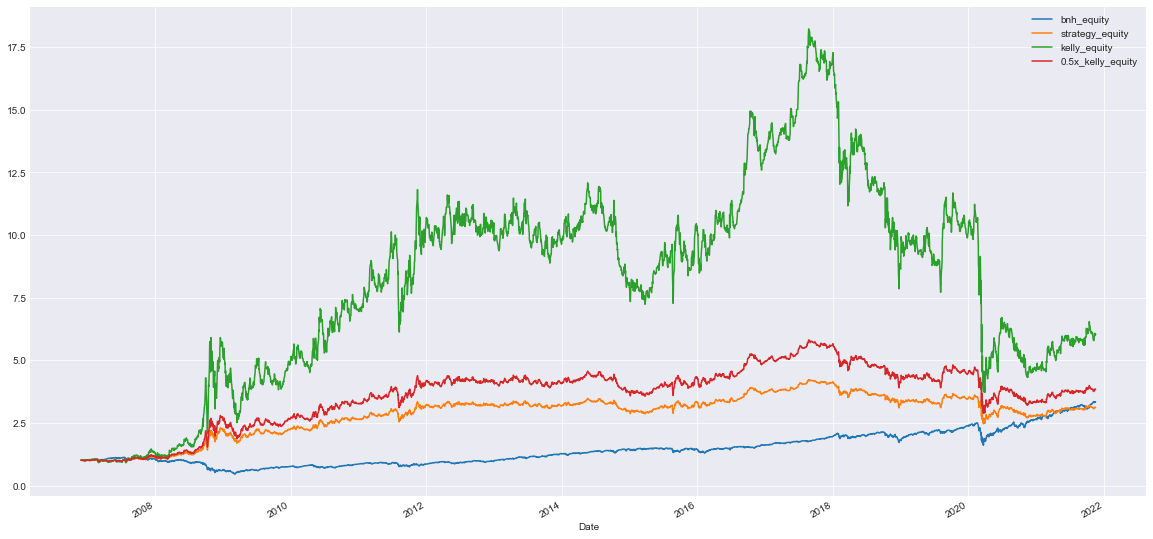

In [75]:
# To visualise the equity curves:
SPY_MR.df[['bnh_equity', 'strategy_equity', 'kelly_equity', '0.5x_kelly_equity']]. plot(figsize = (20, 10), grid = True)
plt.show() ;


In [76]:
# Terminal wealth for the backtesting period can be extracted from the last equity value 
print( 'Terminal wealth for Buy & Hold Strategy : {}'.format(np.round(SPY_MR.df['bnh_equity'] [-1], 2)))
print( 'Terminal wealth for Mean Reversion Strategy : {}'.format(np.round(SPY_MR.df['strategy_equity'] [-1], 2)))
print( 'Terminal wealth for Kelly-sized Strategy : {}'.format(np.round(SPY_MR.df['kelly_equity'] [-1], 2)))
print( 'Terminal wealth for 1/2 Kelly Strategy : {}'.format(np.round(SPY_MR.df['0.5x_kelly_equity'] [-1], 2)))

Terminal wealth for Buy & Hold Strategy : 3.34
Terminal wealth for Mean Reversion Strategy : 3.12
Terminal wealth for Kelly-sized Strategy : 6.05
Terminal wealth for 1/2 Kelly Strategy : 3.84


In [77]:
# Annualized return for the backtesting period 
print( 'Annualized return for Buy & Hold Strategy : {}%'.format(np.round((SPY_MR.df['bnh_equity']  [-1] ** (1/(len(dfa.index)/252)) -1)*100, 2))) 
print( 'Annualized return for Mean Reversion Strategy : {}%'.format(np.round((SPY_MR.df['strategy_equity']  [-1] ** (1/(len(dfa.index)/252)) -1)*100, 2))) 
print( 'Annualized return for  Kelly-sized Strategy : {}%'.format(np.round((SPY_MR.df['kelly_equity'] [-1] ** (1/(len(dfa.index)/252)) -1)*100, 2))) 
print( 'Annualized return for  1/2 Kelly Strategy : {}%'.format(np.round((SPY_MR.df['0.5x_kelly_equity'] [-1] ** (1/(len(dfa.index)/252)) -1)*100, 2))) 

Annualized return for Buy & Hold Strategy : 8.39%
Annualized return for Mean Reversion Strategy : 7.89%
Annualized return for  Kelly-sized Strategy : 12.77%
Annualized return for  1/2 Kelly Strategy : 9.4%


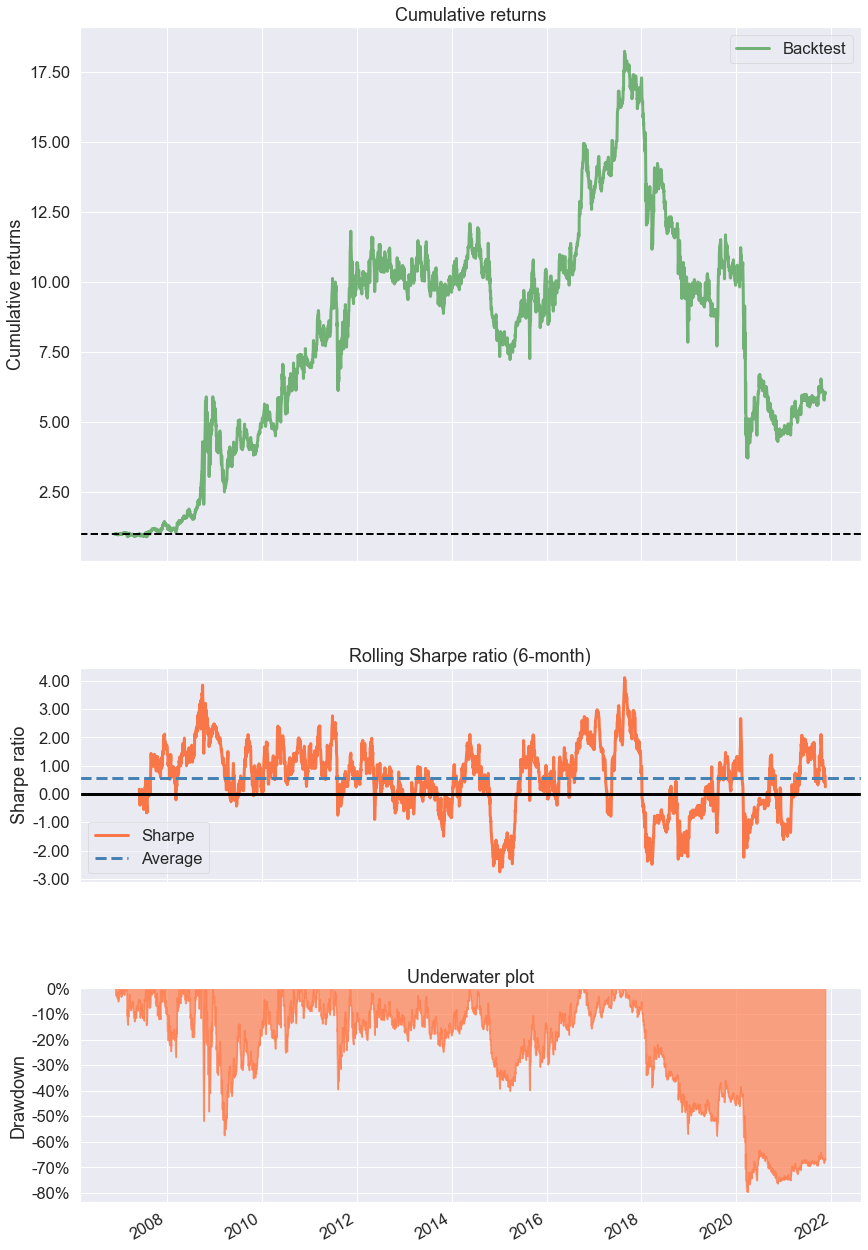

In [78]:
# Further analysis of Kelly-sized strategy:
pf.create_simple_tear_sheet(SPY_MR.df['kelly_returns'])


The max drawdown is about -80%.<br>
However, the Kelly strategy here significantly outperforms the normal Buy & hold strategy.<br>
It is worth investigating if this was the result of over-fitting.

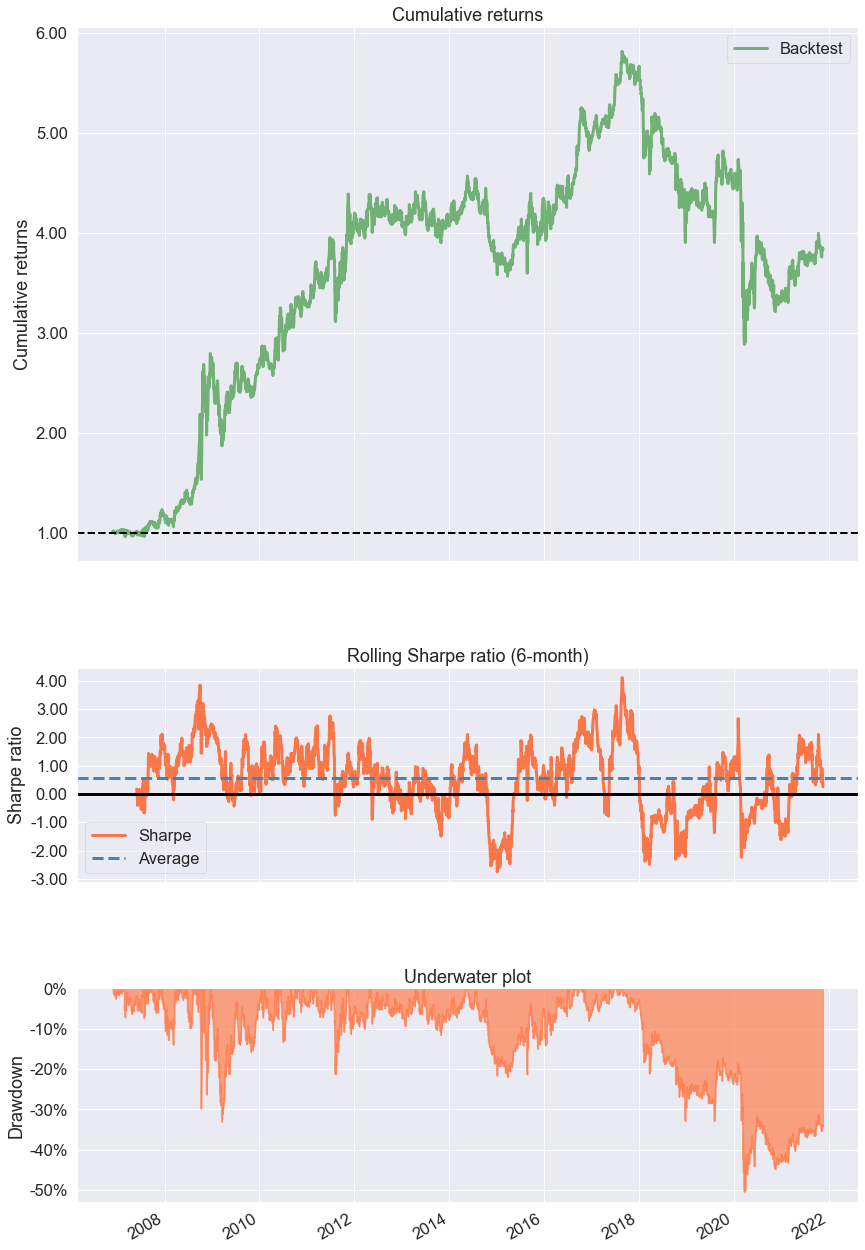

In [79]:
# Further analysis of 1/2 Kelly strategy:
pf.create_simple_tear_sheet(SPY_MR.df['0.5x_kelly_returns'])

## Over-fitting Test

In [80]:
split = int(len(SPY_MR.df) * 0.7)   # we will use 70% of data for training
split

2639

In [81]:
# In-Sample data
is_data = SPY_MR.df.iloc[:split]

In [82]:
# Out-Of-Sample data
oos_data = SPY_MR.df.iloc[split:]

In [83]:
# Checking data
is_data.tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-05-17  240.080002  240.080002  235.750000  235.820007  216.768280   
2017-05-18  235.729996  237.750000  235.429993  236.770004  217.641525   
2017-05-19  237.330002  239.080002  237.270004  238.309998  219.057083   
2017-05-22  238.899994  239.710007  238.820007  239.520004  220.169388   
2017-05-23  239.949997  240.240005  239.509995  240.050003  220.656525   

               Volume         SMA        SD     UpperBB     LowerBB  ...  \
Date                                                                 ...   
2017-05-17  172174100  219.610480  1.661892  220.441426  218.779534  ...   
2017-05-18  107047700  219.130649  1.843099  220.052198  218.209099  ...   
2017-05-19  115011400  219.007465  1.818203  219.916566  218.098363  ...   
2017-05-22   61010600  218.864081  1.653834  219.690998  218.037164  ...   
2017-05-23   48341700  218.858560  1.646269  219.681695  218.035426  ...   

            Position_short  position  bnh_returns  strategy_returns  \
Date                                                                  
2017-05-17             0.0       1.0    -0.017903          0.017903   
2017-05-18             0.0       1.0     0.004020          0.004020   
2017-05-19             0.0       0.0     0.006483          0.006483   
2017-05-22            -1.0      -1.0     0.005065          0.000000   
2017-05-23            -1.0      -1.0     0.002210         -0.002210   

            kelly_returns  0.5x_kelly_returns  bnh_equity  strategy_equity  \
Date                                                                         
2017-05-17       0.045296            0.022648    1.695622         3.879607   
2017-05-18       0.010172            0.005086    1.702439         3.895205   
2017-05-19       0.016402            0.008201    1.713476         3.920457   
2017-05-22       0.000000            0.000000    1.722155         3.920457   
2017-05-23      -0.005592           -0.002796    1.725961         3.911793   

            kelly_equity  0.5x_kelly_equity  
Date                                         
2017-05-17     14.660772           5.207616  
2017-05-18     14.809895           5.234101  
2017-05-19     15.052807           5.277026  
2017-05-22     15.052807           5.277026  
2017-05-23     14.968638           5.262272  

[5 rows x 25 columns]

In [84]:
oos_data.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-05-24  240.320007  240.729996  239.929993  240.610001  221.171341   
2017-05-25  241.199997  242.080002  240.960007  241.759995  222.228394   
2017-05-26  241.539993  241.899994  241.449997  241.710007  222.182449   
2017-05-30  241.339996  241.789993  241.160004  241.500000  221.989426   
2017-05-31  241.839996  241.880005  240.639999  241.440002  221.934296   

              Volume         SMA        SD     UpperBB     LowerBB  ...  \
Date                                                                ...   
2017-05-24  46927700  219.739172  1.409175  220.443760  219.034585  ...   
2017-05-25  64071700  220.656546  1.175938  221.244515  220.068577  ...   
2017-05-26  46629900  221.281619  0.914855  221.739047  220.824192  ...   
2017-05-30  35201900  221.645627  0.698080  221.994667  221.296587  ...   
2017-05-31  91796000  221.901181  0.426536  222.114449  221.687913  ...   

            Position_short  position  bnh_returns  strategy_returns  \
Date                                                                  
2017-05-24            -1.0      -1.0     0.002330         -0.002330   
2017-05-25            -1.0      -1.0     0.004768         -0.004768   
2017-05-26            -1.0      -1.0    -0.000207          0.000207   
2017-05-30            -1.0      -1.0    -0.000869          0.000869   
2017-05-31            -1.0      -1.0    -0.000248          0.000248   

            kelly_returns  0.5x_kelly_returns  bnh_equity  strategy_equity  \
Date                                                                         
2017-05-24      -0.005896           -0.002948    1.729983         3.902677   
2017-05-25      -0.012063           -0.006031    1.738231         3.884069   
2017-05-26       0.000523            0.000262    1.737872         3.884872   
2017-05-30       0.002199            0.001099    1.736362         3.888248   
2017-05-31       0.000628            0.000314    1.735930         3.889214   

            kelly_equity  0.5x_kelly_equity  
Date                                         
2017-05-24     14.880385           5.246759  
2017-05-25     14.700884           5.215114  
2017-05-26     14.708574           5.216478  
2017-05-30     14.740917           5.222213  
2017-05-31     14.750180           5.223854  

[5 rows x 25 columns]

In [85]:
# Read the In-Sample data
start1 = dt.date(2006, 11, 28)
end1 = dt.date(2017, 5, 23)
 
print(start1)
print(end1)

2006-11-28
2017-05-23


In [86]:
SPY_MR = backtesting_MR('SPY', start1, end1, 5)

[*********************100%***********************]  1 of 1 completed
Total return: 1.5494856864440343


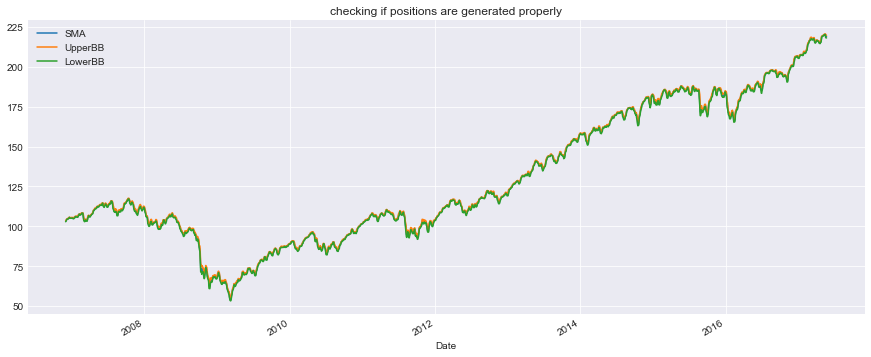

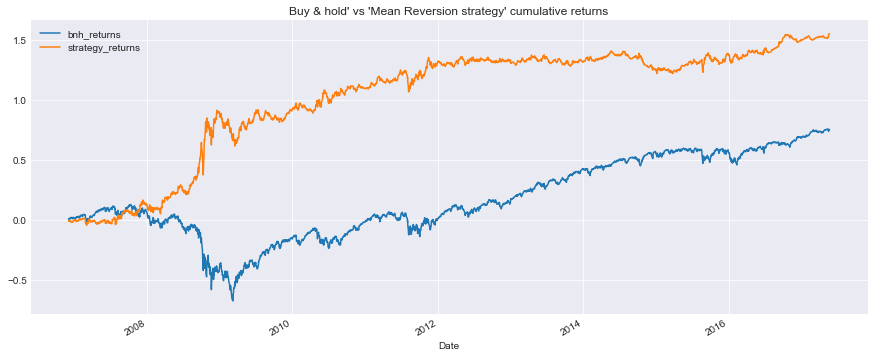

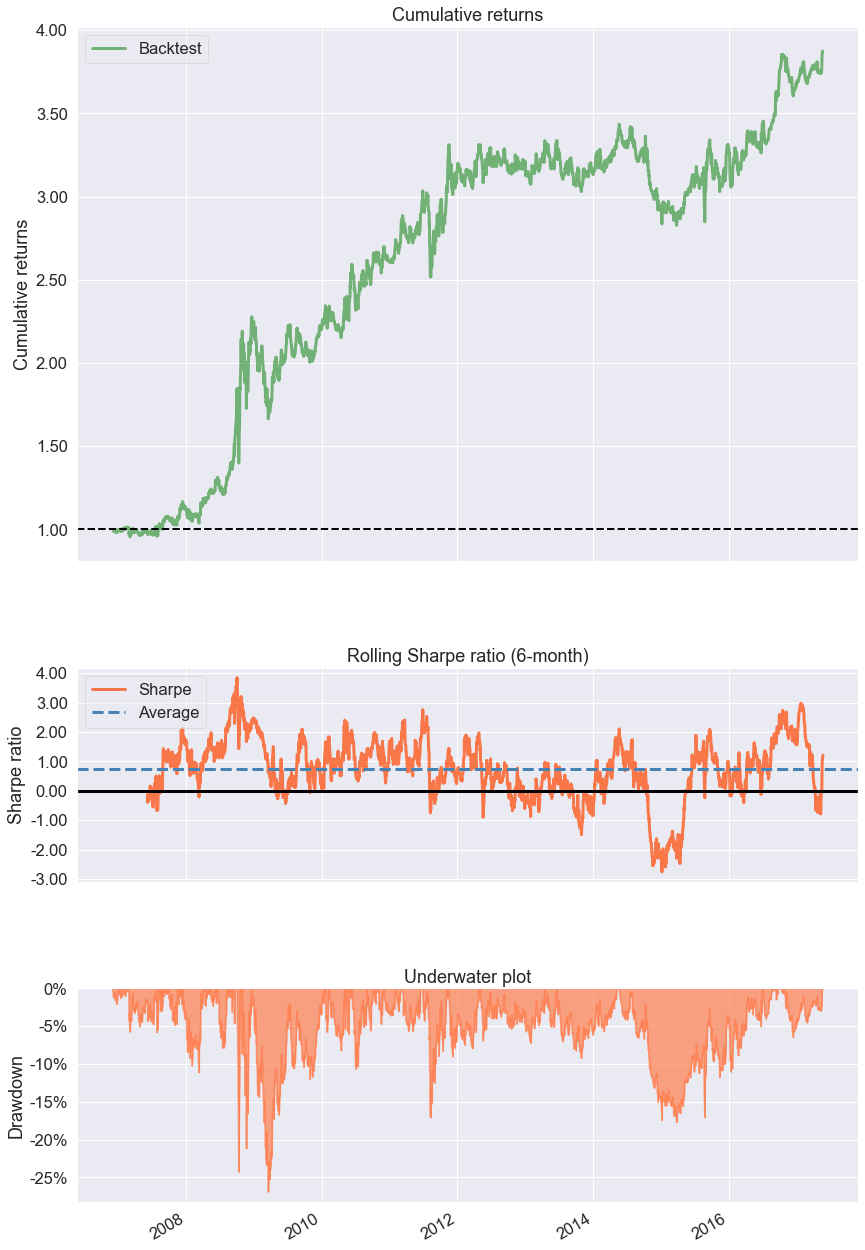

In [87]:
SPY_MR.analysis()

In [88]:
# Computing the optimal Kelly f
optimal_f(SPY_MR.df['strategy_returns'] )

Optimal f: 3.94


In [90]:
# Kelly-sized momentum strategy returns 
f = 3.94
SPY_MR.df['kelly_returns'] = SPY_MR.df['strategy_returns'] * f
SPY_MR.df['0.5x_kelly_returns'] = SPY_MR.df['strategy_returns'] * (0.5*f)

# Equity calculations
SPY_MR.df['bnh_equity'] = np.cumprod(1 + SPY_MR.df['bnh_returns'])
SPY_MR.df['strategy_equity'] = np.cumprod(1 + SPY_MR.df['strategy_returns'])
SPY_MR.df['kelly_equity'] = np.cumprod(1 + SPY_MR.df['kelly_returns'])
SPY_MR.df['0.5x_kelly_equity'] = np.cumprod(1 + SPY_MR.df['0.5x_kelly_returns'])

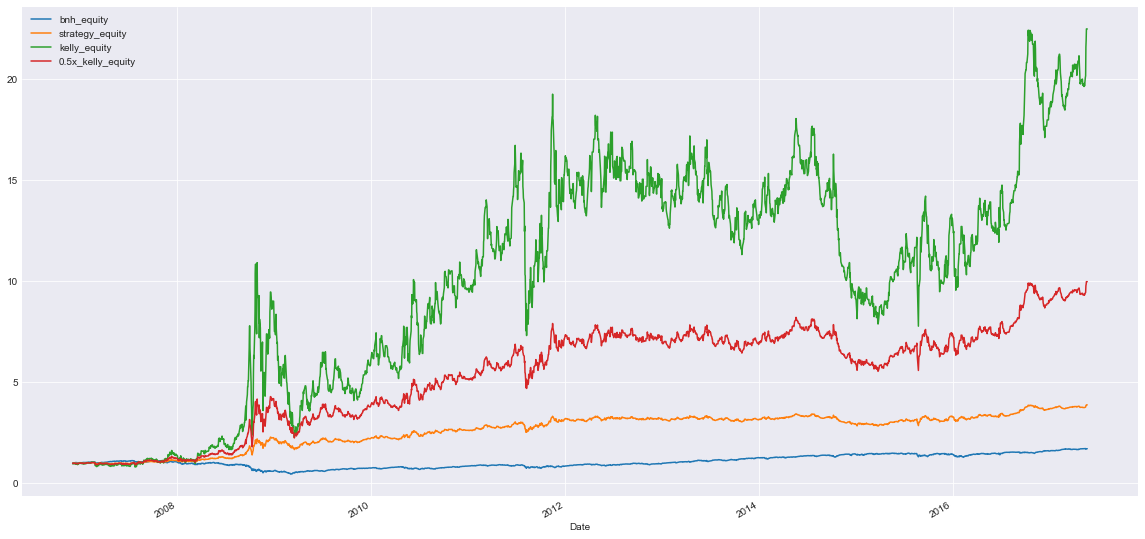

In [91]:
# To visualise the equity curves:
SPY_MR.df[['bnh_equity', 'strategy_equity', 'kelly_equity', '0.5x_kelly_equity']]. plot(figsize = (20, 10), grid = True)
plt.show() ;

In [92]:
# Terminal wealth for the backtesting period can be extracted from the last equity value
print( 'Terminal wealth for Buy & Hold Strategy : {}'.format(np.round(SPY_MR.df['bnh_equity'] [-1], 2)))
print( 'Terminal wealth for Mean Reversion Strategy : {}'.format(np.round(SPY_MR.df['strategy_equity'] [-1], 2)))
print( 'Terminal wealth for Kelly-sized Strategy : {}'.format(np.round(SPY_MR.df['kelly_equity'] [-1], 2)))
print( 'Terminal wealth for 1/2 Kelly Strategy : {}'.format(np.round(SPY_MR.df['0.5x_kelly_equity'] [-1], 2)))

Terminal wealth for Buy & Hold Strategy : 1.71
Terminal wealth for Mean Reversion Strategy : 3.87
Terminal wealth for Kelly-sized Strategy : 22.46
Terminal wealth for 1/2 Kelly Strategy : 9.97


In [93]:
# Annualized return for the backtesting period 
print( 'Annualized return for Buy & Hold Strategy : {}%'.format(np.round((SPY_MR.df['bnh_equity']  [-1] **(1/(len(SPY_MR.df.index)/252)) -1)*100, 2))) 
print( 'Annualized return for Mean Reversion Strategy : {}%'.format(np.round((SPY_MR.df['strategy_equity'][-1] ** (1/(len(SPY_MR.df.index)/252)) -1)*100, 2))) 
print( 'Annualized return for  Kelly-sized Strategy : {}%'.format(np.round((SPY_MR.df['kelly_equity'] [-1]** (1/(len(SPY_MR.df.index)/252)) -1)*100, 2))) 
print( 'Annualized return for  1/2 Kelly Strategy : {}%'.format(np.round((SPY_MR.df['0.5x_kelly_equity'] [-1]** (1/(len(SPY_MR.df.index)/252)) -1)*100, 2))) 

Annualized return for Buy & Hold Strategy : 5.25%
Annualized return for Mean Reversion Strategy : 13.83%
Annualized return for  Kelly-sized Strategy : 34.66%
Annualized return for  1/2 Kelly Strategy : 24.59%


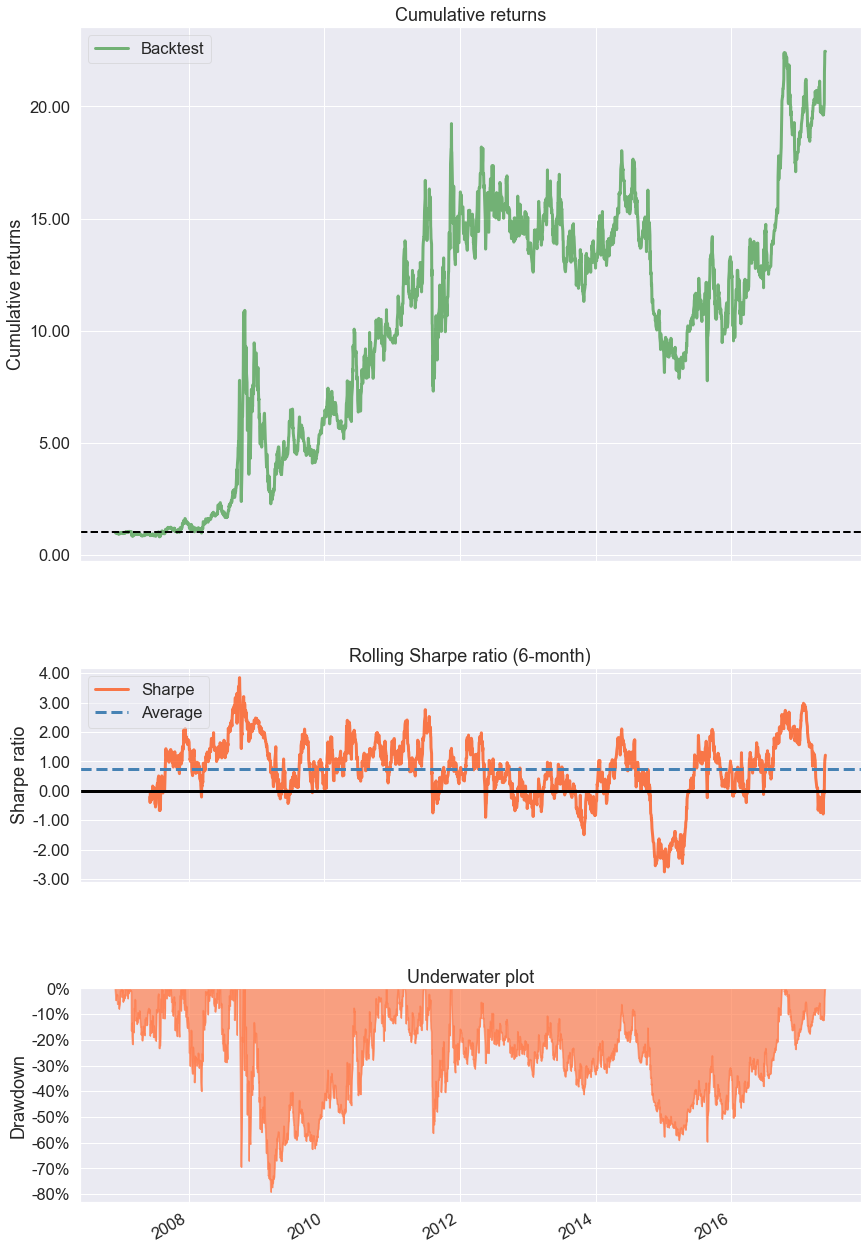

In [94]:
# Further analysis of Kelly-sized strategy:
pf.create_simple_tear_sheet(SPY_MR.df['kelly_returns'])

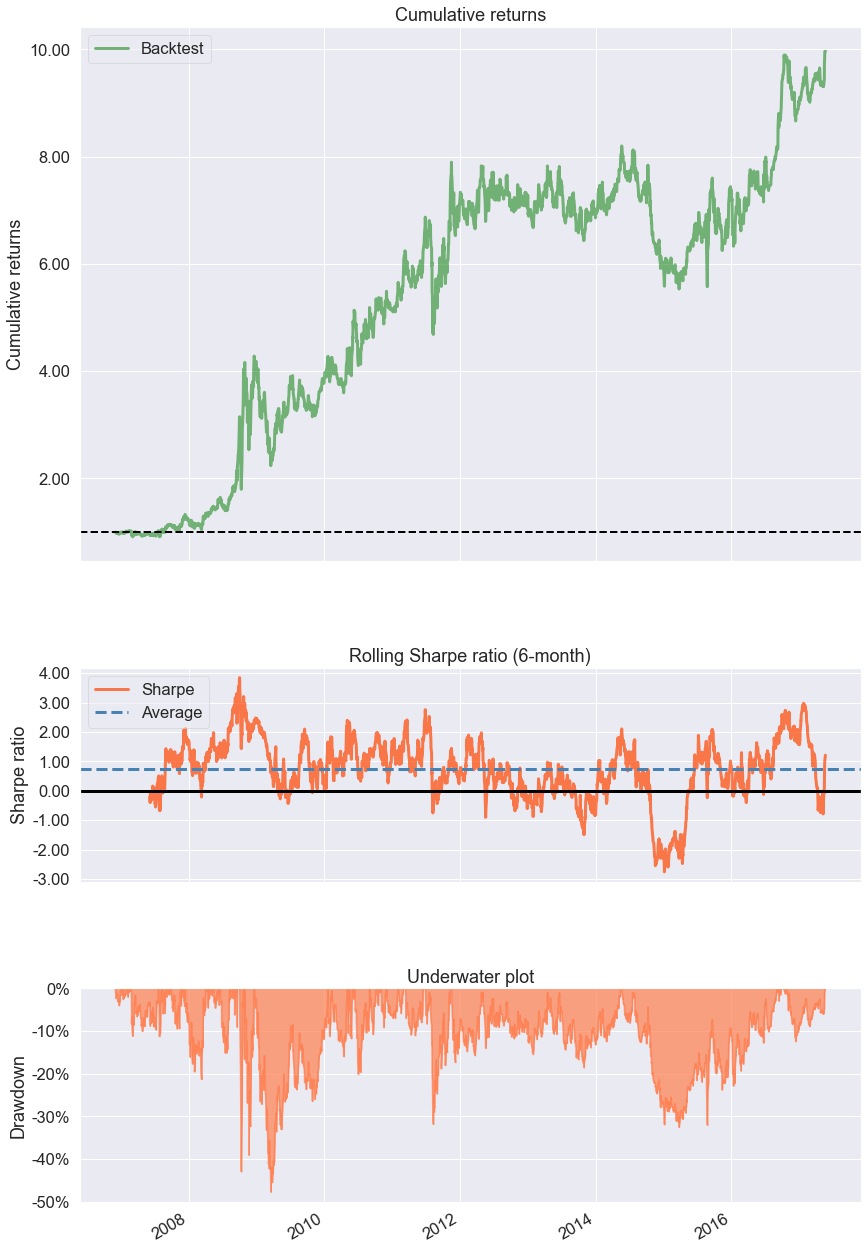

In [95]:
# Further analysis of 1/2 Kelly strategy:
pf.create_simple_tear_sheet(SPY_MR.df['0.5x_kelly_returns'])

In [96]:
# Now let's read the out-of-Sample data
start1 = dt.date(2017, 5, 24)
end1 = dt.date(2021, 11, 17)

print(start1)
print(end1)

2017-05-24
2021-11-17


In [97]:
SPY_MR = backtesting_MR('SPY', start1, end1, 5)

[*********************100%***********************]  1 of 1 completed
Total return: -0.13230407573691008


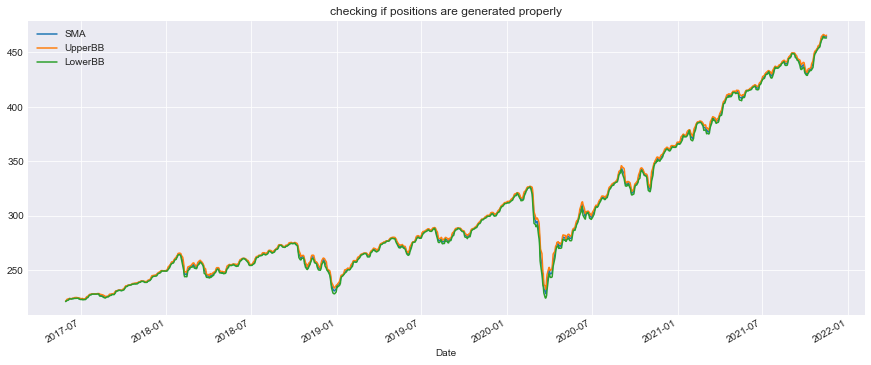

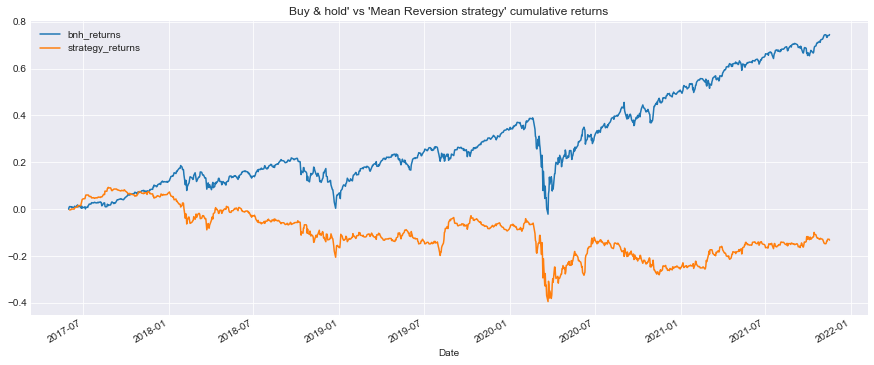

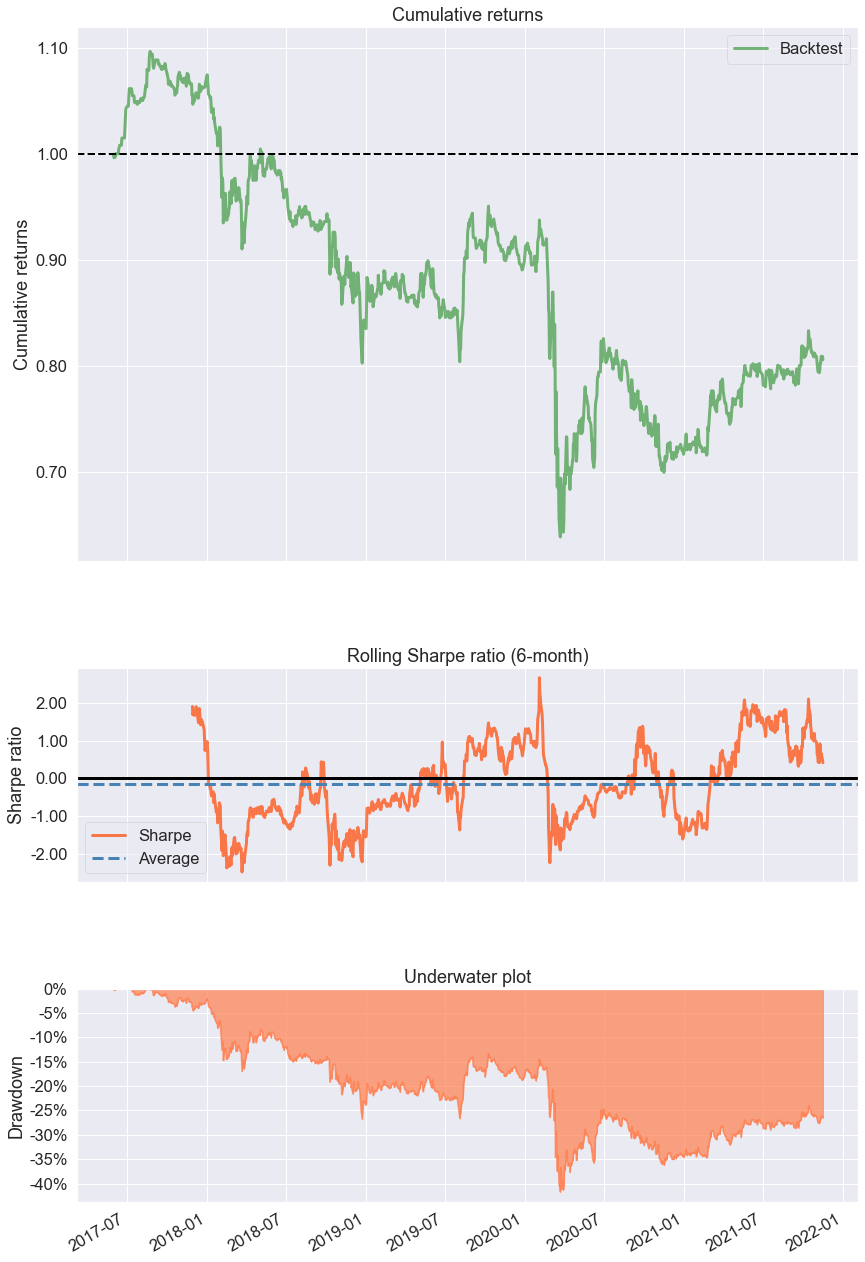

In [98]:
SPY_MR.analysis()

In [100]:
# We will apply the optimal f Kelly fraction computed from the In-Sample data
# Kelly-sized momentum strategy returns 
f = 3.94
SPY_MR.df['kelly_returns'] = SPY_MR.df['strategy_returns'] * f
SPY_MR.df['0.5x_kelly_returns'] = SPY_MR.df['strategy_returns'] * (0.5*f)

# Equity calculations
SPY_MR.df['bnh_equity'] = np.cumprod(1 + SPY_MR.df['bnh_returns'])
SPY_MR.df['strategy_equity'] = np.cumprod(1 + SPY_MR.df['strategy_returns'])
SPY_MR.df['kelly_equity'] = np.cumprod(1 + SPY_MR.df['kelly_returns'])
SPY_MR.df['0.5x_kelly_equity'] = np.cumprod(1 + SPY_MR.df['0.5x_kelly_returns'])

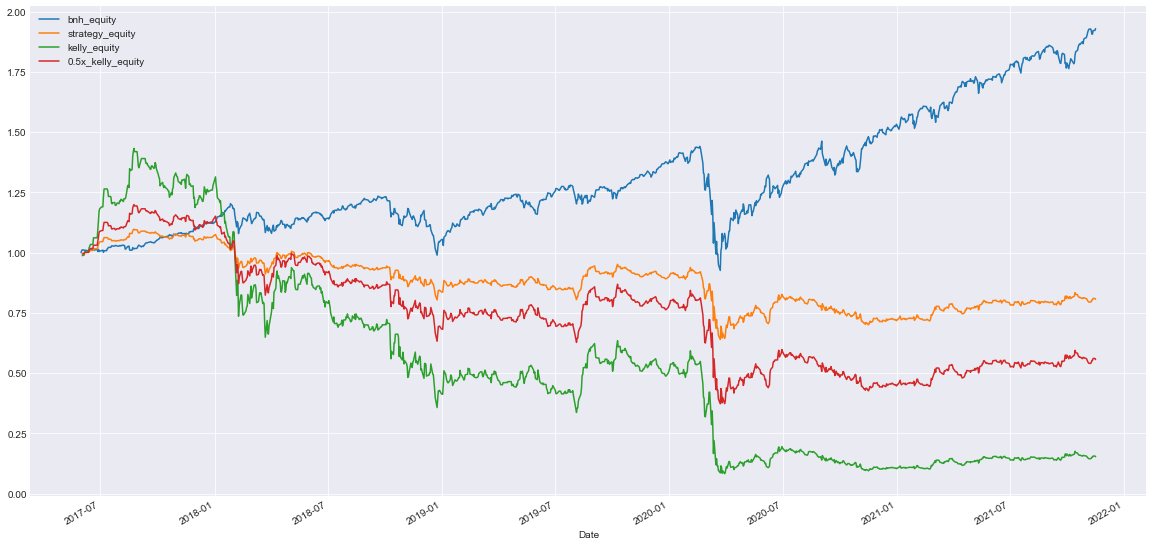

In [101]:
# To visualise the equity curves:
SPY_MR.df[['bnh_equity', 'strategy_equity', 'kelly_equity', '0.5x_kelly_equity']]. plot(figsize = (20, 10), grid = True)
plt.show() ;

In [102]:
# Terminal wealth for the OOS period can be extracted from the last equity value
print( 'Terminal wealth for Buy & Hold Strategy :{}'.format(np.round(SPY_MR.df['bnh_equity'] [-1], 2)))
print( 'Terminal wealth for Mean Reversion Strategy : {}'.format(np.round(SPY_MR.df['strategy_equity'] [-1], 2)))
print( 'Terminal wealth for Kelly-sized Strategy : {}'.format(np.round(SPY_MR.df['kelly_equity'] [-1], 2))) 
print( 'Terminal wealth for 1/2 Kelly Strategy : {}'.format(np.round(SPY_MR.df['0.5x_kelly_equity'] [-1], 2))) 

Terminal wealth for Buy & Hold Strategy :1.93
Terminal wealth for Mean Reversion Strategy : 0.81
Terminal wealth for Kelly-sized Strategy : 0.15
Terminal wealth for 1/2 Kelly Strategy : 0.56


In [103]:
# Annualized return for the OOS period 
print( 'Annualized return for Buy & Hold Strategy : {}%'.format(np.round((SPY_MR.df['bnh_equity']  [-1] **(1/(len(SPY_MR.df.index)/252)) -1)*100, 2)))
print( 'Annualized return for Mean Reversion Strategy : {}%'.format(np.round((SPY_MR.df['strategy_equity'][-1] ** (1/(len(SPY_MR.df.index)/252)) -1)*100, 2)))
print( 'Annualized return for  Kelly-sized Strategy : {}%'.format(np.round((SPY_MR.df['kelly_equity'] [-1]** (1/(len(SPY_MR.df.index)/252)) -1)*100, 2)))
print( 'Annualized return for  1/2 Kelly Strategy : {}%'.format(np.round((SPY_MR.df['0.5x_kelly_equity'] [-1]** (1/(len(SPY_MR.df.index)/252)) -1)*100, 2)))

Annualized return for Buy & Hold Strategy : 15.83%
Annualized return for Mean Reversion Strategy : -4.7%
Annualized return for  Kelly-sized Strategy : -34.27%
Annualized return for  1/2 Kelly Strategy : -12.3%


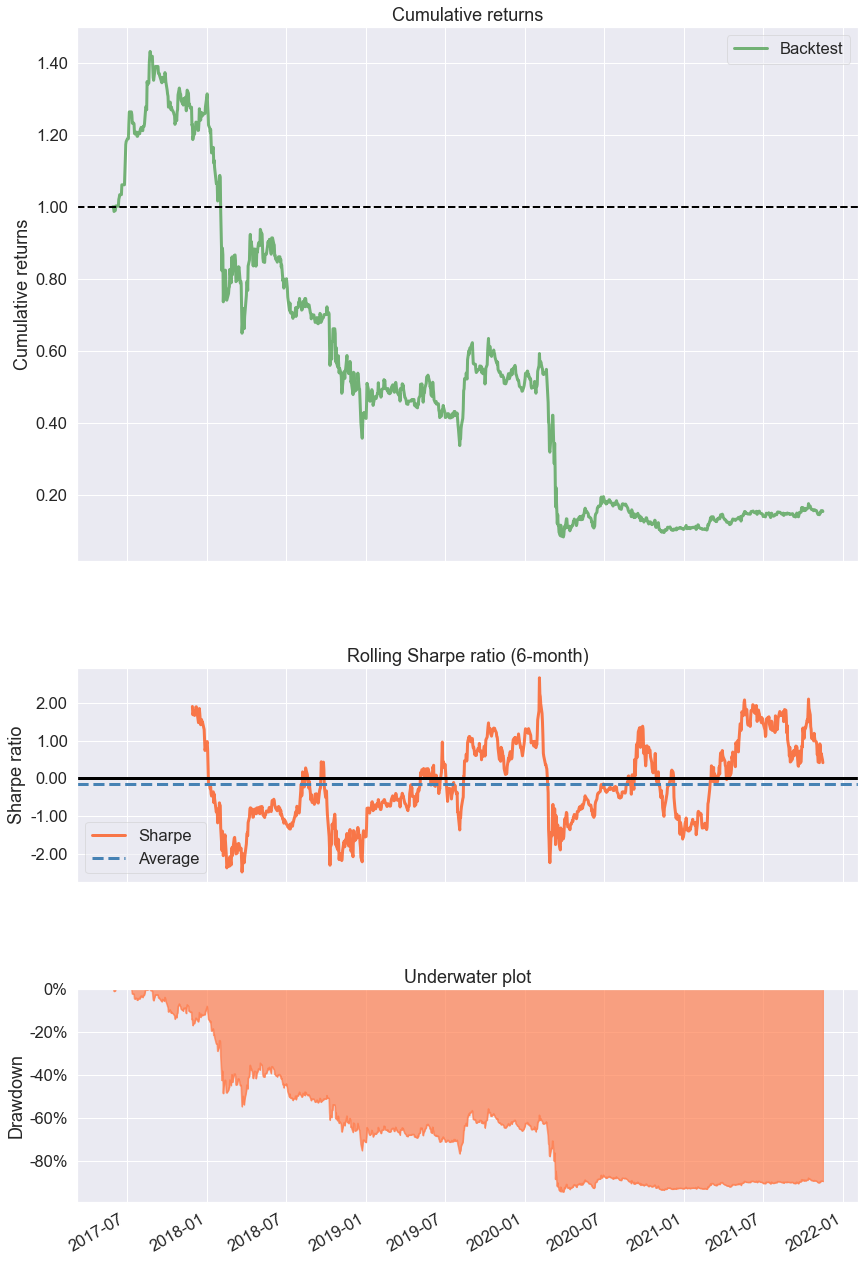

In [104]:
# Further analysis of Kelly-sized strategy:
pf.create_simple_tear_sheet(SPY_MR.df['kelly_returns'])

# Optimal f while limiting drawdown / "Capped f"

In [110]:
def equity_curve(returns):
    _equity_curve = (1 + returns).cumprod(axis=0)
    return _equity_curve

def drawdown(equity_curve):
    eq_series = pd.DataFrame(equity_curve)
    _drawdown = eq_series / eq_series.cummax() - 1
    return _drawdown

def max_drawdown(equity_curve, percent=True):
    abs_drawdown = np.abs(drawdown(equity_curve)).values
    _max_drawdown = np.max(abs_drawdown)
    if percent == True:
        return _max_drawdown * 100
    else:
        return _max_drawdown

def twr(equity_curve, start_at_1=True):
    eq_arr = np.array(equity_curve)
    if start_at_1 == True:
        _twr = eq_arr[-1] 
    else:
        _twr = eq_arr[-1] / eq_arr[0]
    return _twr

def ghpr(equity_curve):
    _twr = twr(equity_curve)
    _ghpr = _twr ** (1 / len(equity_curve)) - 1
    return _ghpr
       
def get_capped_f(returns, drawdown_limit):
    f_values = np.linspace(0, 0.99, 100)   # between 0 and 1, generate 100 samples.
    max_loss = np.abs(np.min(returns))
    capped_f = f_values / max_loss
    df = pd.DataFrame(columns=['ghpr', 'drawdown'])    
    for f in capped_f:
        eq = equity_curve(f * returns)
        _max_drawdown = max_drawdown(eq)
        if _max_drawdown <= drawdown_limit:
            _ghpr = ghpr(eq)
        else:
            _ghpr = 0
        df.loc[f, 'ghpr'] = _ghpr * 100
        df.loc[f, 'drawdown'] = _max_drawdown
    capped_f = df['ghpr'].astype(float).idxmax()
    return {'f_curve':df, 'capped_f':capped_f, 'max_loss':max_loss}

def f_plot(f, title=''):
    f_curve = f['f_curve']
    capped_f = f['capped_f']
    capped_f_ghpr = f_curve.loc[capped_f, 'ghpr']
    limit_dd = f_curve.loc[2 * capped_f, 'drawdown']

    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    f_curve.plot(secondary_y='drawdown', ax=ax)

    ax.set_xlim(0, capped_f * 2)
    ax.set_ylim(0, 1.5 * capped_f_ghpr)
    ax.right_ax.set_ylim(0)
    ax.set_title(title + ' GHPR vs Drawdown')
    ax.set_xlabel('f-value')
    ax.set_ylabel('GHPR (%)')
    ax.right_ax.set_ylabel('Drawdown (%)')
    ax.axvline(capped_f, linestyle=':', color='red')
    
    plt.savefig(title + ' f Drawdown Curve.png')   
    plt.show()
    
def f_results(f):
    f_curve = f['f_curve']
    capped_f = f['capped_f']
    ghpr = f_curve.loc[capped_f, 'ghpr']
    drawdown = f_curve.loc[capped_f, 'drawdown']
    
    print('Capped f: {}'.format(np.round(capped_f, 3)))
    print('GHPR: {}%'.format(np.round(ghpr, 3)))
    print('Max Drawdown: {}%'.format(np.round(drawdown, 2)))

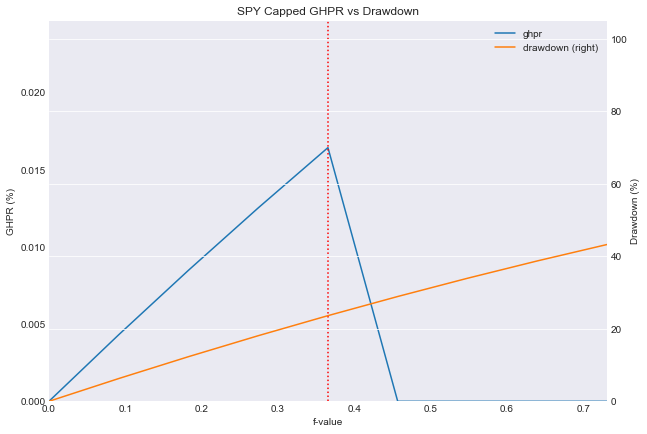

Capped f: 0.366
GHPR: 0.016%
Max Drawdown: 23.63%


In [111]:
# Setting at 25% drawdown limit
spy_capped_f = get_capped_f(spy_returns, drawdown_limit=25)     
f_plot(spy_capped_f, 'SPY Capped')
f_results(spy_capped_f)

# Path dependency


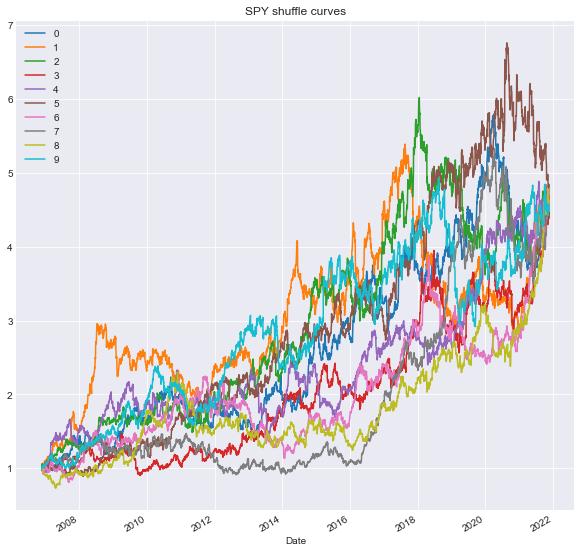

In [258]:
def random_curves(returns, n_curves):
    curves = pd.DataFrame(index=returns.index)
    for i in range(n_curves):
        shuffle = np.random.permutation(returns)
        curves[i] = equity_curve(shuffle)
    return curves

spy_shuffle = random_curves(spy_returns, 10)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
spy_shuffle.plot(ax=ax)
ax.set_title('SPY shuffle curves')
plt.savefig('SPY shuffle curves.png')
plt.show()


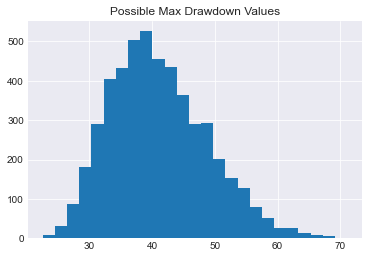

Minimum Drawdown: 22.574%
Maximum Drawdown: 71.1%


In [259]:
# Generating 5000 curves and plot a histogram
spy_shuffle_5000 = random_curves(spy_returns, 5000)
spy_drawdown_5000 = spy_shuffle_5000.apply(max_drawdown)
spy_drawdown_5000.hist(bins=25)

plt.title('Possible Max Drawdown Values')
plt.savefig('5000 SPY Drawdown Values.png')
plt.show()

print('Minimum Drawdown: {}%'.format(np.round(spy_drawdown_5000.min(), 3)))
print('Maximum Drawdown: {}%'.format(np.round(spy_drawdown_5000.max(), 3)))
